## Задание 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, Adagrad

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.
/Users/linuxoid/.virtualenvs/dl4cv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/linuxoid/.virtualenvs/dl4cv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/linuxoid/.virtualenvs/dl4cv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/linuxoid/.vir

In [2]:
a1 = 0.2
b1 = 0.2
x0_1 = 0.25 # координаты параллельного переноса
y0_1 = -0.25
alpha1 = 0 #угол поворота

a2 = 0.7
b2 = 0.5
x0_2 = 0
y0_2 = 0
alpha2 = -np.pi/3

a3 = 1
b3 = 1
x0_3 = 0
y0_3 = 0
alpha3 = 0

In [3]:
t = np.linspace(0, 2 * np.pi, int(2 * np.pi / 0.025), endpoint=True)

In [4]:
def f(alpha, x0, a, t, y0, b):
    return (x0 + a * np.cos(t)) * np.cos(alpha) + (y0 + b * np.sin(t)) * np.sin(alpha)

def g(alpha, x0, a, t, y0, b):
    return -(x0 + a * np.cos(t)) * np.sin(alpha) + (y0 + b * np.sin(t)) * np.cos(alpha)

In [5]:
x1 = f(alpha1, x0_1, a1, t, y0_1, b1)
y1 = g(alpha1, x0_1, a1, t, y0_1, b1)

x2 = f(alpha2, x0_2, a2, t, y0_2, b2)
y2 = g(alpha2, x0_2, a2, t, y0_2, b2)

x3 = f(alpha3, x0_3, a3, t, y0_3, b3)
y3 = g(alpha3, x0_3, a3, t, y0_3, b3)

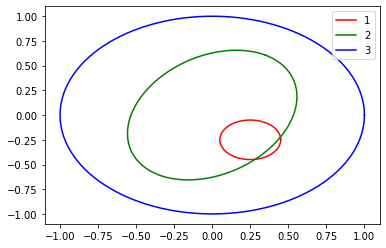

In [6]:
plt.plot(x1, y1, 'r', label='1')
plt.plot(x2, y2, 'g', label='2')
plt.plot(x3, y3, 'b', label='3')
plt.legend()

Разделим выборку на тренировочную, тестовую и валидационную в соотношении 70% 10% 20% соответственно

In [7]:
df1 = pd.DataFrame({'x' : x1, 'y' : y1, 'class' : 0})
df2 = pd.DataFrame({'x' : x2, 'y' : y2, 'class' : 1})
df3 = pd.DataFrame({'x' : x3, 'y' : y3, 'class' : 2})

In [8]:
def Splitter(data):
    xTrain, xTest = train_test_split(data, test_size=0.3, shuffle=True, random_state=42)
    xValid, xTest = train_test_split(xTest, test_size=0.3, shuffle=True, random_state=42)
    return xTrain, xTest, xValid

In [9]:
train, test, valid = [], [], []

tmpTrain, tmpTest, tmpValid = Splitter(df1)
train.append(tmpTrain)
test.append(tmpTest)
valid.append(tmpValid)

tmpTrain, tmpTest, tmpValid = Splitter(df2)
train.append(tmpTrain)
test.append(tmpTest)
valid.append(tmpValid)

tmpTrain, tmpTest, tmpValid = Splitter(df3)
train.append(tmpTrain)
test.append(tmpTest)
valid.append(tmpValid)

train = pd.concat(train)
valid = pd.concat(valid)
test = pd.concat(test)

Архитектура сети

In [10]:
model = Sequential()
model.add(Dense(20, input_shape=(2,), activation='tanh'))
model.add(Dense(3, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])

Обучаем нейросеть на 300 эпохах.

In [12]:
y = pd.get_dummies(train['class'])
history = model.fit(train.iloc[:, :-1], y, epochs=300, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/300
525/525 [==============================] - 0s 314us/step - loss: 0.6505 - accuracy: 0.6305
Epoch 2/300
525/525 [==============================] - 0s 55us/step - loss: 0.6111 - accuracy: 0.6400
Epoch 3/300
525/525 [==============================] - 0s 59us/step - loss: 0.6063 - accuracy: 0.6197
Epoch 4/300
525/525 [==============================] - 0s 48us/step - loss: 0.6027 - accuracy: 0.6419
Epoch 5/300
525/525 [==============================] - 0s 60us/step - loss: 0.6027 - accuracy: 0.6260
Epoch 6/300
525/525 [==============================] - 0s 53us/step - loss: 0.6010 - accuracy: 0.6387
Epoch 7/300
525/525 [==============================] - 0s 54us/step - loss: 0.5994 - accuracy: 0.6413
Epoch 8/300
525/525 [==============================] - 0s 42us/step - loss: 0.5962 - accuracy: 0.6248
Epoch 9/300
525/525 [==============================] - 0s 53us/step - loss: 0.5957 - accuracy: 0.6616
Epoch 10/300
525/525 [===========

525/525 [==============================] - 0s 39us/step - loss: 0.0998 - accuracy: 0.9721
Epoch 157/300
525/525 [==============================] - 0s 40us/step - loss: 0.0993 - accuracy: 0.9740
Epoch 158/300
525/525 [==============================] - 0s 43us/step - loss: 0.0992 - accuracy: 0.9727
Epoch 159/300
525/525 [==============================] - 0s 40us/step - loss: 0.0991 - accuracy: 0.9746
Epoch 160/300
525/525 [==============================] - 0s 39us/step - loss: 0.0978 - accuracy: 0.9733
Epoch 161/300
525/525 [==============================] - 0s 41us/step - loss: 0.0973 - accuracy: 0.9746
Epoch 162/300
525/525 [==============================] - 0s 39us/step - loss: 0.0981 - accuracy: 0.9721
Epoch 163/300
525/525 [==============================] - 0s 41us/step - loss: 0.0965 - accuracy: 0.9740
Epoch 164/300
525/525 [==============================] - 0s 43us/step - loss: 0.0959 - accuracy: 0.9746
Epoch 165/300
525/525 [==============================] - 0s 42us/step - loss: 

Метрики обучения

In [13]:
p = []

p.append(model.predict_classes(train.iloc[:, :-1]))
accTrain = accuracy_score(train['class'], p[-1])
mseTrain = mean_squared_error(train['class'], p[-1])

p.append(model.predict_classes(test.iloc[:, :-1]))
accTest = accuracy_score(test['class'], p[-1])
mseTest = mean_squared_error(test['class'], p[-1])

p.append(model.predict_classes(valid.iloc[:, :-1]))
accValid = accuracy_score(valid['class'], p[-1])
mseValid = mean_squared_error(valid['class'], p[-1])

In [14]:
print('Train accuracy = {}'.format(accTrain))
print(f'Train MSE = {mseTrain}')
print(f'Train RMSE = {np.sqrt(mseTrain)}\n')

print('Test accuracy = {}'.format(accTest))
print(f'Test MSE = {mseTest}')
print(f'Test RMSE = {np.sqrt(mseTest)}\n')

print('Valid accuracy = {}'.format(accValid))
print(f'Valid MSE = {mseValid}')
print(f'Valid RMSE = {np.sqrt(mseValid)}')

Train accuracy = 0.9676190476190476
Train MSE = 0.03238095238095238
Train RMSE = 0.17994708216848745

Test accuracy = 0.9565217391304348
Test MSE = 0.043478260869565216
Test RMSE = 0.20851441405707477

Valid accuracy = 0.9685534591194969
Valid MSE = 0.031446540880503145
Valid RMSE = 0.17733172553297716


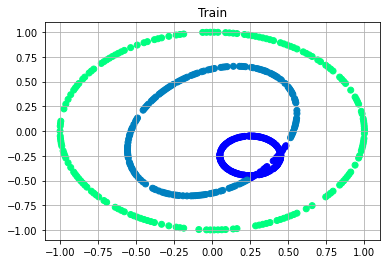

In [15]:
plt.scatter(train['x'], train['y'], c=p[0], cmap=plt.cm.winter)
plt.grid(True)
plt.title('Train')
plt.show()

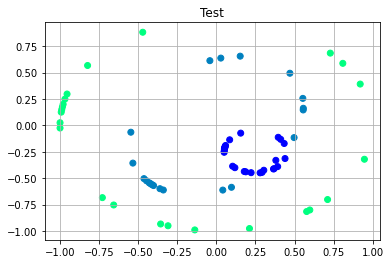

In [16]:
plt.scatter(test['x'], test['y'], c=p[1], cmap=plt.cm.winter)
plt.grid(True)
plt.title('Test')
plt.show()

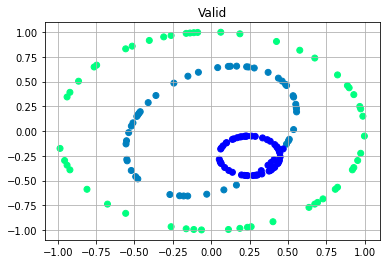

In [17]:
plt.scatter(valid['x'], valid['y'], c=p[2], cmap=plt.cm.winter)
plt.grid(True)
plt.title('Valid')
plt.show()

Зададим область точек [-1.2, 1.2] x [-1.2, 1.2]. Получим сетку для указанной области с шагом h = 0.025.

In [18]:
h = 0.025
x = np.arange(-1.2, 1.2 + h, h)
y = np.arange(-1.2, 1.2 + h, h)

По уже обученной модели предскажем класс для каждой точки сетки.

In [19]:
predictions = [model.predict(np.array([[i, j]])).round(1) for i in x for j in y]

Получим матрицу координат из координатных векторов.

In [20]:
xx, yy = np.meshgrid(x, y)

In [21]:
xx

array([[-1.2  , -1.175, -1.15 , ...,  1.15 ,  1.175,  1.2  ],
       [-1.2  , -1.175, -1.15 , ...,  1.15 ,  1.175,  1.2  ],
       [-1.2  , -1.175, -1.15 , ...,  1.15 ,  1.175,  1.2  ],
       ...,
       [-1.2  , -1.175, -1.15 , ...,  1.15 ,  1.175,  1.2  ],
       [-1.2  , -1.175, -1.15 , ...,  1.15 ,  1.175,  1.2  ],
       [-1.2  , -1.175, -1.15 , ...,  1.15 ,  1.175,  1.2  ]])

In [22]:
yy

array([[-1.2  , -1.2  , -1.2  , ..., -1.2  , -1.2  , -1.2  ],
       [-1.175, -1.175, -1.175, ..., -1.175, -1.175, -1.175],
       [-1.15 , -1.15 , -1.15 , ..., -1.15 , -1.15 , -1.15 ],
       ...,
       [ 1.15 ,  1.15 ,  1.15 , ...,  1.15 ,  1.15 ,  1.15 ],
       [ 1.175,  1.175,  1.175, ...,  1.175,  1.175,  1.175],
       [ 1.2  ,  1.2  ,  1.2  , ...,  1.2  ,  1.2  ,  1.2  ]])

Формируем таблицу цветов

In [23]:
colors = np.array(predictions).reshape((len(predictions), 3))
colors.shape

(9409, 3)

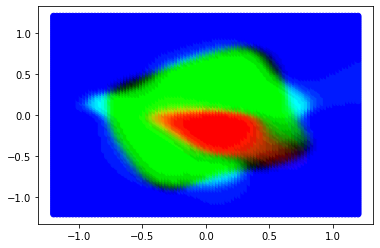

In [24]:
plt.scatter(yy, xx, c=colors, cmap=plt.cm.winter);
plt.show()

## Задание 2

#### Метод 1-го порядка:
### Метод сопряженных градиентов:
#### traincgp - метод полака-рибейры
количество нейронов в скрытом слое 10

In [25]:
from neupy import algorithms
from neupy.layers import Input, Tanh, Linear, Sigmoid

Функция для обучения в соответствии с вариантом задания

In [26]:
def f(t):
    return np.sin(np.sin(t) * t**2 - t)

t = np.linspace(1, 4.5, int(4.5 / 0.01), endpoint=True)
x = f(t)

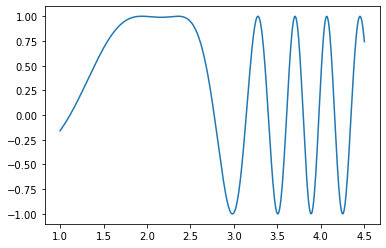

In [27]:
plt.plot(t, x)

Делим на тестовую и тренировочную выборку

In [28]:
percentTrain = 0.9

trainSize = int(len(t) * percentTrain)

xTrain = t[:trainSize]
yTrain = x[:trainSize]
xTest = t[trainSize:]
yTest = x[trainSize:]

Нормализуем тестовые и тренировочные данные.

In [29]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

scaledTrainX = scaler_x.fit_transform(xTrain[:, np.newaxis])
scaledTestX = scaler_x.transform(xTest[:, np.newaxis])
scaledTrainY = scaler_y.fit_transform(yTrain[:, np.newaxis])

Архитектура нейросети

In [30]:
traincgp = algorithms.ConjugateGradient(network=[Input(1),
                                                Tanh(15),
                                                Linear(1),],
                                        update_function='polak_ribiere', verbose=True)


Main information

[ALGORITHM] ConjugateGradient

[OPTION] epsilon = 1e-07
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] target = Tensor("placeholder/target/linear-1:0", shape=(?, 1), dtype=float32)
[OPTION] update_function = polak_ribiere
[OPTION] verbose = True
[OPTION] wolfe_c1 = 0.0001
[OPTION] wolfe_c2 = 0.9
[OPTION] wolfe_maxiter = 20

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 1.08 seconds


In [31]:
traincgp.train(scaledTrainX, scaledTrainY, epochs=4000)

#1 : [527 ms] train: 0.818616
#2 : [5 ms] train: 0.739954
#3 : [6 ms] train: 0.693288
#4 : [1 ms] train: 0.666623
#5 : [2 ms] train: 0.596862
#6 : [5 ms] train: 0.536669
#7 : [6 ms] train: 0.531953
#8 : [6 ms] train: 0.527768
#9 : [5 ms] train: 0.526136
#10 : [5 ms] train: 0.516079
#11 : [6 ms] train: 0.513972
#12 : [5 ms] train: 0.513142
#13 : [5 ms] train: 0.508127
#14 : [2 ms] train: 0.507800
#15 : [6 ms] train: 0.507576
#16 : [7 ms] train: 0.507461
#17 : [5 ms] train: 0.506456
#18 : [3 ms] train: 0.506150
#19 : [5 ms] train: 0.505446
#20 : [3 ms] train: 0.505109
#21 : [5 ms] train: 0.504148
#22 : [2 ms] train: 0.504031
#23 : [5 ms] train: 0.503908
#24 : [5 ms] train: 0.503866
#25 : [6 ms] train: 0.503215
#26 : [2 ms] train: 0.503104
#27 : [6 ms] train: 0.502954
#28 : [1 ms] train: 0.502749
#29 : [5 ms] train: 0.501933
#30 : [1 ms] train: 0.501735
#31 : [5 ms] train: 0.501405
#32 : [2 ms] train: 0.501262
#33 : [5 ms] train: 0.500922
#34 : [1 ms] train: 0.500732
#35 : [5 ms] train: 0

#47 : [7 ms] train: 0.495460
#48 : [6 ms] train: 0.495170
#49 : [6 ms] train: 0.495051
#50 : [2 ms] train: 0.494597
#51 : [2 ms] train: 0.494580
#52 : [1 ms] train: 0.494475
#53 : [6 ms] train: 0.494088
#54 : [6 ms] train: 0.492634
#55 : [5 ms] train: 0.491439
#56 : [2 ms] train: 0.491164
#57 : [1 ms] train: 0.490627
#58 : [1 ms] train: 0.489554
#59 : [5 ms] train: 0.486272
#60 : [4 ms] train: 0.484321
#61 : [5 ms] train: 0.482284
#62 : [5 ms] train: 0.480747
#63 : [4 ms] train: 0.478093
#64 : [5 ms] train: 0.477215
#65 : [5 ms] train: 0.476227
#66 : [5 ms] train: 0.475636
#67 : [5 ms] train: 0.474656
#68 : [2 ms] train: 0.474142
#69 : [4 ms] train: 0.473230
#70 : [5 ms] train: 0.472557
#71 : [5 ms] train: 0.471233
#72 : [5 ms] train: 0.470387
#73 : [6 ms] train: 0.468894
#74 : [6 ms] train: 0.467431
#75 : [4 ms] train: 0.464481
#76 : [5 ms] train: 0.463177
#77 : [4 ms] train: 0.461811
#78 : [5 ms] train: 0.460645
#79 : [5 ms] train: 0.458409
#80 : [4 ms] train: 0.456992
#81 : [5 ms] t

#90 : [23 ms] train: 0.441190
#91 : [7 ms] train: 0.440086
#92 : [5 ms] train: 0.439417
#93 : [8 ms] train: 0.438780
#94 : [6 ms] train: 0.438490
#95 : [1 ms] train: 0.438163
#96 : [5 ms] train: 0.437509
#97 : [5 ms] train: 0.436734
#98 : [6 ms] train: 0.435581
#99 : [6 ms] train: 0.435276
#100 : [2 ms] train: 0.434947
#101 : [1 ms] train: 0.434130
#102 : [6 ms] train: 0.433100
#103 : [2 ms] train: 0.432856
#104 : [4 ms] train: 0.431998
#105 : [4 ms] train: 0.431130
#106 : [2 ms] train: 0.430243
#107 : [5 ms] train: 0.428647
#108 : [5 ms] train: 0.427975
#109 : [5 ms] train: 0.424512
#110 : [1 ms] train: 0.422572
#111 : [5 ms] train: 0.419912
#112 : [2 ms] train: 0.419613
#113 : [2 ms] train: 0.419317
#114 : [5 ms] train: 0.418687
#115 : [2 ms] train: 0.418580
#116 : [2 ms] train: 0.418112
#117 : [5 ms] train: 0.416948
#118 : [5 ms] train: 0.416495
#119 : [1 ms] train: 0.416362
#120 : [4 ms] train: 0.416063
#121 : [2 ms] train: 0.415655
#122 : [5 ms] train: 0.415503
#123 : [5 ms] train

#141 : [6 ms] train: 0.405789
#142 : [2 ms] train: 0.405603
#143 : [10 ms] train: 0.405433
#144 : [6 ms] train: 0.405389
#145 : [1 ms] train: 0.405180
#146 : [6 ms] train: 0.405029
#147 : [6 ms] train: 0.404965
#148 : [2 ms] train: 0.404426
#149 : [5 ms] train: 0.404135
#150 : [2 ms] train: 0.403830
#151 : [6 ms] train: 0.402285
#152 : [5 ms] train: 0.401603
#153 : [5 ms] train: 0.394320
#154 : [5 ms] train: 0.392162
#155 : [5 ms] train: 0.390854
#156 : [2 ms] train: 0.387487
#157 : [5 ms] train: 0.381013
#158 : [1 ms] train: 0.377814
#159 : [5 ms] train: 0.374270
#160 : [5 ms] train: 0.372415
#161 : [4 ms] train: 0.371050
#162 : [2 ms] train: 0.370574
#163 : [4 ms] train: 0.369573
#164 : [5 ms] train: 0.369123
#165 : [1 ms] train: 0.368825
#166 : [5 ms] train: 0.368372
#167 : [5 ms] train: 0.367654
#168 : [5 ms] train: 0.367069
#169 : [1 ms] train: 0.366729
#170 : [5 ms] train: 0.365627
#171 : [5 ms] train: 0.364720
#172 : [5 ms] train: 0.363543
#173 : [1 ms] train: 0.362541
#174 : [5

#188 : [8 ms] train: 0.341527
#189 : [4 ms] train: 0.341073
#190 : [5 ms] train: 0.340941
#191 : [5 ms] train: 0.340698
#192 : [3 ms] train: 0.340312
#193 : [5 ms] train: 0.339737
#194 : [5 ms] train: 0.339574
#195 : [5 ms] train: 0.338959
#196 : [1 ms] train: 0.338780
#197 : [2 ms] train: 0.338561
#198 : [1 ms] train: 0.336859
#199 : [5 ms] train: 0.331534
#200 : [5 ms] train: 0.331019
#201 : [5 ms] train: 0.330347
#202 : [5 ms] train: 0.329825
#203 : [7 ms] train: 0.327205
#204 : [2 ms] train: 0.326427
#205 : [5 ms] train: 0.325676
#206 : [5 ms] train: 0.323168
#207 : [1 ms] train: 0.322137
#208 : [5 ms] train: 0.319411
#209 : [1 ms] train: 0.318908
#210 : [1 ms] train: 0.317175
#211 : [5 ms] train: 0.316397
#212 : [4 ms] train: 0.314603
#213 : [2 ms] train: 0.314258
#214 : [5 ms] train: 0.313237
#215 : [1 ms] train: 0.313199
#216 : [5 ms] train: 0.309910
#217 : [2 ms] train: 0.309407
#218 : [5 ms] train: 0.309033
#219 : [1 ms] train: 0.308829
#220 : [5 ms] train: 0.308034
#221 : [2 

#239 : [12 ms] train: 0.298882
#240 : [2 ms] train: 0.298282
#241 : [7 ms] train: 0.297922
#242 : [5 ms] train: 0.297801
#243 : [2 ms] train: 0.297166
#244 : [6 ms] train: 0.297092
#245 : [6 ms] train: 0.297070
#246 : [2 ms] train: 0.296747
#247 : [6 ms] train: 0.296588
#248 : [5 ms] train: 0.296351
#249 : [6 ms] train: 0.295938
#250 : [1 ms] train: 0.295720
#251 : [6 ms] train: 0.295514
#252 : [6 ms] train: 0.295311
#253 : [6 ms] train: 0.294123
#254 : [2 ms] train: 0.292991
#255 : [6 ms] train: 0.291246
#256 : [2 ms] train: 0.288847
#257 : [6 ms] train: 0.285289
#258 : [6 ms] train: 0.284785
#259 : [6 ms] train: 0.284821
#260 : [6 ms] train: 0.284125
#261 : [6 ms] train: 0.284103
#262 : [2 ms] train: 0.283781
#263 : [5 ms] train: 0.283571
#264 : [6 ms] train: 0.283464
#265 : [2 ms] train: 0.283395
#266 : [6 ms] train: 0.283278
#267 : [6 ms] train: 0.283171
#268 : [6 ms] train: 0.282851
#269 : [5 ms] train: 0.282153
#270 : [3 ms] train: 0.281642
#271 : [6 ms] train: 0.281229
#272 : [6

#282 : [9 ms] train: 0.280007
#283 : [6 ms] train: 0.279821
#284 : [6 ms] train: 0.279471
#285 : [6 ms] train: 0.279150
#286 : [5 ms] train: 0.278794
#287 : [5 ms] train: 0.278675
#288 : [6 ms] train: 0.278513
#289 : [5 ms] train: 0.278454
#290 : [6 ms] train: 0.278325
#291 : [6 ms] train: 0.278185
#292 : [2 ms] train: 0.278067
#293 : [5 ms] train: 0.277651
#294 : [5 ms] train: 0.277214
#295 : [2 ms] train: 0.277059
#296 : [1 ms] train: 0.276867
#297 : [5 ms] train: 0.275979
#298 : [6 ms] train: 0.275407
#299 : [6 ms] train: 0.274665
#300 : [6 ms] train: 0.273846
#301 : [5 ms] train: 0.273427
#302 : [5 ms] train: 0.272916
#303 : [1 ms] train: 0.272696
#304 : [5 ms] train: 0.272217
#305 : [5 ms] train: 0.271523
#306 : [3 ms] train: 0.271358
#307 : [5 ms] train: 0.270887
#308 : [5 ms] train: 0.270575
#309 : [5 ms] train: 0.270300
#310 : [6 ms] train: 0.269997
#311 : [5 ms] train: 0.269742
#312 : [5 ms] train: 0.268982
#313 : [6 ms] train: 0.268553
#314 : [5 ms] train: 0.268380
#315 : [5 

#324 : [7 ms] train: 0.266724
#325 : [6 ms] train: 0.266610
#326 : [6 ms] train: 0.266579
#327 : [1 ms] train: 0.266508
#328 : [5 ms] train: 0.266430
#329 : [6 ms] train: 0.266415
#330 : [5 ms] train: 0.266116
#331 : [2 ms] train: 0.266032
#332 : [7 ms] train: 0.265938
#333 : [2 ms] train: 0.265815
#334 : [5 ms] train: 0.265691
#335 : [6 ms] train: 0.265610
#336 : [6 ms] train: 0.265154
#337 : [1 ms] train: 0.264910
#338 : [5 ms] train: 0.264223
#339 : [5 ms] train: 0.263706
#340 : [2 ms] train: 0.263636
#341 : [6 ms] train: 0.263265
#342 : [2 ms] train: 0.263187
#343 : [2 ms] train: 0.263115
#344 : [6 ms] train: 0.263058
#345 : [6 ms] train: 0.262910
#346 : [6 ms] train: 0.262856
#347 : [5 ms] train: 0.262748
#348 : [2 ms] train: 0.262740
#349 : [2 ms] train: 0.262713
#350 : [6 ms] train: 0.262674
#351 : [5 ms] train: 0.262621
#352 : [2 ms] train: 0.262595
#353 : [2 ms] train: 0.262477
#354 : [6 ms] train: 0.262290
#355 : [2 ms] train: 0.262174
#356 : [5 ms] train: 0.262088
#357 : [1 

#371 : [10 ms] train: 0.260991
#372 : [7 ms] train: 0.260991
#373 : [6 ms] train: 0.260937
#374 : [1 ms] train: 0.260923
#375 : [6 ms] train: 0.260910
#376 : [5 ms] train: 0.260899
#377 : [2 ms] train: 0.260879
#378 : [5 ms] train: 0.260853
#379 : [5 ms] train: 0.260850
#380 : [5 ms] train: 0.260818
#381 : [5 ms] train: 0.260646
#382 : [5 ms] train: 0.260621
#383 : [1 ms] train: 0.260607
#384 : [5 ms] train: 0.260277
#385 : [5 ms] train: 0.260073
#386 : [2 ms] train: 0.259785
#387 : [4 ms] train: 0.259667
#388 : [5 ms] train: 0.259599
#389 : [5 ms] train: 0.259218
#390 : [5 ms] train: 0.258800
#391 : [5 ms] train: 0.258429
#392 : [2 ms] train: 0.258192
#393 : [5 ms] train: 0.257817
#394 : [5 ms] train: 0.257577
#395 : [5 ms] train: 0.257454
#396 : [2 ms] train: 0.257184
#397 : [1 ms] train: 0.257062
#398 : [2 ms] train: 0.256606
#399 : [6 ms] train: 0.256219
#400 : [5 ms] train: 0.256042
#401 : [5 ms] train: 0.255519
#402 : [5 ms] train: 0.255229
#403 : [1 ms] train: 0.255208
#404 : [2

#420 : [3 ms] train: 0.254479
#421 : [9 ms] train: 0.254422
#422 : [6 ms] train: 0.254412
#423 : [5 ms] train: 0.254298
#424 : [1 ms] train: 0.254200
#425 : [5 ms] train: 0.253797
#426 : [1 ms] train: 0.253737
#427 : [6 ms] train: 0.253535
#428 : [2 ms] train: 0.253408
#429 : [5 ms] train: 0.253213
#430 : [2 ms] train: 0.253080
#431 : [5 ms] train: 0.252973
#432 : [5 ms] train: 0.252949
#433 : [2 ms] train: 0.252703
#434 : [1 ms] train: 0.252441
#435 : [5 ms] train: 0.252381
#436 : [5 ms] train: 0.252342
#437 : [1 ms] train: 0.252254
#438 : [1 ms] train: 0.252198
#439 : [6 ms] train: 0.252158
#440 : [5 ms] train: 0.252128
#441 : [1 ms] train: 0.252073
#442 : [5 ms] train: 0.252023
#443 : [2 ms] train: 0.252005
#444 : [2 ms] train: 0.251943
#445 : [1 ms] train: 0.251898
#446 : [5 ms] train: 0.251681
#447 : [5 ms] train: 0.251651
#448 : [1 ms] train: 0.251603
#449 : [5 ms] train: 0.251576
#450 : [5 ms] train: 0.251572
#451 : [1 ms] train: 0.251544
#452 : [5 ms] train: 0.251519
#453 : [2 

#471 : [7 ms] train: 0.250334
#472 : [3 ms] train: 0.250326
#473 : [7 ms] train: 0.250302
#474 : [5 ms] train: 0.250228
#475 : [3 ms] train: 0.250037
#476 : [5 ms] train: 0.249970
#477 : [5 ms] train: 0.249953
#478 : [2 ms] train: 0.249887
#479 : [3 ms] train: 0.249877
#480 : [5 ms] train: 0.249736
#481 : [5 ms] train: 0.249525
#482 : [5 ms] train: 0.249457
#483 : [1 ms] train: 0.249407
#484 : [1 ms] train: 0.249384
#485 : [5 ms] train: 0.249291
#486 : [1 ms] train: 0.249204
#487 : [5 ms] train: 0.248943
#488 : [5 ms] train: 0.248895
#489 : [6 ms] train: 0.248827
#490 : [1 ms] train: 0.248785
#491 : [5 ms] train: 0.248719
#492 : [5 ms] train: 0.248719
#493 : [2 ms] train: 0.248602
#494 : [5 ms] train: 0.248477
#495 : [5 ms] train: 0.248472
#496 : [2 ms] train: 0.248278
#497 : [5 ms] train: 0.248192
#498 : [2 ms] train: 0.248151
#499 : [5 ms] train: 0.248077
#500 : [2 ms] train: 0.248054
#501 : [6 ms] train: 0.248026
#502 : [2 ms] train: 0.247985
#503 : [5 ms] train: 0.247964
#504 : [5 

#521 : [9 ms] train: 0.247496
#522 : [6 ms] train: 0.247472
#523 : [5 ms] train: 0.247448
#524 : [5 ms] train: 0.247406
#525 : [5 ms] train: 0.247381
#526 : [5 ms] train: 0.247322
#527 : [2 ms] train: 0.247294
#528 : [5 ms] train: 0.247123
#529 : [5 ms] train: 0.247032
#530 : [5 ms] train: 0.246731
#531 : [5 ms] train: 0.246553
#532 : [5 ms] train: 0.246543
#533 : [2 ms] train: 0.246522
#534 : [6 ms] train: 0.246504
#535 : [1 ms] train: 0.246502
#536 : [5 ms] train: 0.246476
#537 : [2 ms] train: 0.246469
#538 : [5 ms] train: 0.246439
#539 : [2 ms] train: 0.246432
#540 : [5 ms] train: 0.246425
#541 : [6 ms] train: 0.246416
#542 : [5 ms] train: 0.246226
#543 : [5 ms] train: 0.246185
#544 : [5 ms] train: 0.246159
#545 : [2 ms] train: 0.245942
#546 : [5 ms] train: 0.245424
#547 : [5 ms] train: 0.243744
#548 : [5 ms] train: 0.242203
#549 : [5 ms] train: 0.242219
#550 : [2 ms] train: 0.241145
#551 : [5 ms] train: 0.240903
#552 : [2 ms] train: 0.240717
#553 : [5 ms] train: 0.240651
#554 : [5 

#569 : [6 ms] train: 0.240160
#570 : [4 ms] train: 0.239882
#571 : [7 ms] train: 0.239875
#572 : [2 ms] train: 0.239870
#573 : [5 ms] train: 0.239857
#574 : [2 ms] train: 0.239853
#575 : [2 ms] train: 0.239842
#576 : [1 ms] train: 0.239829
#577 : [5 ms] train: 0.239762
#578 : [5 ms] train: 0.239730
#579 : [1 ms] train: 0.239698
#580 : [5 ms] train: 0.239656
#581 : [6 ms] train: 0.239638
#582 : [5 ms] train: 0.239609
#583 : [5 ms] train: 0.239562
#584 : [1 ms] train: 0.239549
#585 : [5 ms] train: 0.239506
#586 : [1 ms] train: 0.239490
#587 : [5 ms] train: 0.239447
#588 : [5 ms] train: 0.239441
#589 : [1 ms] train: 0.239432
#590 : [5 ms] train: 0.239428
#591 : [2 ms] train: 0.239420
#592 : [5 ms] train: 0.239400
#593 : [4 ms] train: 0.239370
#594 : [5 ms] train: 0.239271
#595 : [1 ms] train: 0.239218
#596 : [5 ms] train: 0.239197
#597 : [6 ms] train: 0.239198
#598 : [6 ms] train: 0.239059
#599 : [2 ms] train: 0.238957
#600 : [6 ms] train: 0.238900
#601 : [2 ms] train: 0.238855
#602 : [5 

#621 : [3 ms] train: 0.237524
#622 : [9 ms] train: 0.237117
#623 : [3 ms] train: 0.236771
#624 : [5 ms] train: 0.236345
#625 : [2 ms] train: 0.236170
#626 : [6 ms] train: 0.235353
#627 : [1 ms] train: 0.234971
#628 : [6 ms] train: 0.234137
#629 : [5 ms] train: 0.233879
#630 : [5 ms] train: 0.232113
#631 : [6 ms] train: 0.231005
#632 : [5 ms] train: 0.230864
#633 : [5 ms] train: 0.230599
#634 : [5 ms] train: 0.230036
#635 : [2 ms] train: 0.229834
#636 : [6 ms] train: 0.229581
#637 : [2 ms] train: 0.229506
#638 : [7 ms] train: 0.229114
#639 : [2 ms] train: 0.229028
#640 : [5 ms] train: 0.228808
#641 : [5 ms] train: 0.228805
#642 : [5 ms] train: 0.228504
#643 : [1 ms] train: 0.228396
#644 : [5 ms] train: 0.228331
#645 : [6 ms] train: 0.228297
#646 : [5 ms] train: 0.228268
#647 : [2 ms] train: 0.228228
#648 : [5 ms] train: 0.228159
#649 : [5 ms] train: 0.228038
#650 : [5 ms] train: 0.227888
#651 : [2 ms] train: 0.227770
#652 : [5 ms] train: 0.227726
#653 : [1 ms] train: 0.227682
#654 : [5 

#667 : [5 ms] train: 0.224178
#668 : [4 ms] train: 0.223825
#669 : [8 ms] train: 0.222418
#670 : [2 ms] train: 0.222340
#671 : [5 ms] train: 0.221708
#672 : [5 ms] train: 0.221520
#673 : [6 ms] train: 0.221238
#674 : [2 ms] train: 0.221152
#675 : [5 ms] train: 0.220757
#676 : [5 ms] train: 0.219910
#677 : [2 ms] train: 0.219801
#678 : [5 ms] train: 0.218539
#679 : [6 ms] train: 0.217885
#680 : [5 ms] train: 0.216840
#681 : [2 ms] train: 0.216714
#682 : [5 ms] train: 0.216359
#683 : [1 ms] train: 0.216267
#684 : [5 ms] train: 0.215969
#685 : [5 ms] train: 0.215906
#686 : [5 ms] train: 0.215671
#687 : [1 ms] train: 0.215618
#688 : [5 ms] train: 0.215530
#689 : [2 ms] train: 0.215513
#690 : [1 ms] train: 0.215420
#691 : [5 ms] train: 0.215374
#692 : [2 ms] train: 0.215214
#693 : [1 ms] train: 0.214973
#694 : [5 ms] train: 0.214900
#695 : [2 ms] train: 0.214789
#696 : [3 ms] train: 0.214738
#697 : [5 ms] train: 0.214667
#698 : [7 ms] train: 0.214642
#699 : [5 ms] train: 0.214467
#700 : [2 

#717 : [5 ms] train: 0.212716
#718 : [4 ms] train: 0.212689
#719 : [9 ms] train: 0.212597
#720 : [1 ms] train: 0.212553
#721 : [5 ms] train: 0.212353
#722 : [2 ms] train: 0.212289
#723 : [1 ms] train: 0.211974
#724 : [5 ms] train: 0.211773
#725 : [2 ms] train: 0.211496
#726 : [5 ms] train: 0.211013
#727 : [1 ms] train: 0.210398
#728 : [5 ms] train: 0.209859
#729 : [5 ms] train: 0.209537
#730 : [5 ms] train: 0.209247
#731 : [5 ms] train: 0.208977
#732 : [5 ms] train: 0.208913
#733 : [5 ms] train: 0.208850
#734 : [5 ms] train: 0.208815
#735 : [1 ms] train: 0.208782
#736 : [5 ms] train: 0.208760
#737 : [5 ms] train: 0.208760
#738 : [5 ms] train: 0.208734
#739 : [1 ms] train: 0.208701
#740 : [5 ms] train: 0.208673
#741 : [2 ms] train: 0.208659
#742 : [5 ms] train: 0.208629
#743 : [6 ms] train: 0.208600
#744 : [8 ms] train: 0.208578
#745 : [3 ms] train: 0.208558
#746 : [2 ms] train: 0.208324
#747 : [6 ms] train: 0.208234
#748 : [1 ms] train: 0.208183
#749 : [5 ms] train: 0.208094
#750 : [1 

#763 : [7 ms] train: 0.206512
#764 : [46 ms] train: 0.206490
#765 : [3 ms] train: 0.206471
#766 : [4 ms] train: 0.206420
#767 : [4 ms] train: 0.206358
#768 : [13 ms] train: 0.206068
#769 : [3 ms] train: 0.206041
#770 : [6 ms] train: 0.205954
#771 : [7 ms] train: 0.205884
#772 : [6 ms] train: 0.205784
#773 : [10 ms] train: 0.205767
#774 : [3 ms] train: 0.205739
#775 : [6 ms] train: 0.205722
#776 : [3 ms] train: 0.205715
#777 : [7 ms] train: 0.205702
#778 : [7 ms] train: 0.205696
#779 : [6 ms] train: 0.205637
#780 : [3 ms] train: 0.205624
#781 : [11 ms] train: 0.205599
#782 : [2 ms] train: 0.205532
#783 : [5 ms] train: 0.205484
#784 : [5 ms] train: 0.205470
#785 : [5 ms] train: 0.205458
#786 : [5 ms] train: 0.205450
#787 : [5 ms] train: 0.205439
#788 : [6 ms] train: 0.205402
#789 : [5 ms] train: 0.205378
#790 : [1 ms] train: 0.205367
#791 : [5 ms] train: 0.205339
#792 : [5 ms] train: 0.205299
#793 : [2 ms] train: 0.205235
#794 : [2 ms] train: 0.205198
#795 : [1 ms] train: 0.205060
#796 :

#797 : [6 ms] train: 0.204715
#798 : [6 ms] train: 0.204411
#799 : [6 ms] train: 0.204307
#800 : [6 ms] train: 0.204240
#801 : [5 ms] train: 0.204174
#802 : [9 ms] train: 0.204064
#803 : [7 ms] train: 0.204025
#804 : [5 ms] train: 0.203984
#805 : [5 ms] train: 0.203951
#806 : [7 ms] train: 0.203900
#807 : [5 ms] train: 0.203812
#808 : [5 ms] train: 0.203797
#809 : [1 ms] train: 0.203790
#810 : [1 ms] train: 0.203751
#811 : [4 ms] train: 0.203689
#812 : [4 ms] train: 0.203678
#813 : [5 ms] train: 0.203662
#814 : [4 ms] train: 0.203656
#815 : [2 ms] train: 0.203615
#816 : [5 ms] train: 0.203599
#817 : [5 ms] train: 0.203564
#818 : [5 ms] train: 0.203522
#819 : [5 ms] train: 0.203451
#820 : [1 ms] train: 0.203405
#821 : [5 ms] train: 0.203307
#822 : [2 ms] train: 0.203213
#823 : [5 ms] train: 0.203145
#824 : [3 ms] train: 0.203057
#825 : [10 ms] train: 0.202906
#826 : [2 ms] train: 0.202824
#827 : [5 ms] train: 0.202626
#828 : [5 ms] train: 0.202503
#829 : [4 ms] train: 0.202335
#830 : [2

#842 : [2 ms] train: 0.201708
#843 : [7 ms] train: 0.201659
#844 : [2 ms] train: 0.201639
#845 : [5 ms] train: 0.201563
#846 : [2 ms] train: 0.201511
#847 : [4 ms] train: 0.201345
#848 : [5 ms] train: 0.201143
#849 : [6 ms] train: 0.201088
#850 : [2 ms] train: 0.201051
#851 : [9 ms] train: 0.200946
#852 : [6 ms] train: 0.200862
#853 : [4 ms] train: 0.200815
#854 : [1 ms] train: 0.200773
#855 : [6 ms] train: 0.200752
#856 : [5 ms] train: 0.200715
#857 : [1 ms] train: 0.200700
#858 : [6 ms] train: 0.200645
#859 : [5 ms] train: 0.200613
#860 : [5 ms] train: 0.200477
#861 : [5 ms] train: 0.200415
#862 : [5 ms] train: 0.200353
#863 : [1 ms] train: 0.200335
#864 : [2 ms] train: 0.200286
#865 : [5 ms] train: 0.200273
#866 : [5 ms] train: 0.200048
#867 : [2 ms] train: 0.199924
#868 : [5 ms] train: 0.199701
#869 : [1 ms] train: 0.199609
#870 : [2 ms] train: 0.199529
#871 : [5 ms] train: 0.199458
#872 : [1 ms] train: 0.199305
#873 : [6 ms] train: 0.199198
#874 : [7 ms] train: 0.199030
#875 : [17

#884 : [7 ms] train: 0.198406
#885 : [19 ms] train: 0.198381
#886 : [5 ms] train: 0.198350
#887 : [3 ms] train: 0.198332
#888 : [6 ms] train: 0.198253
#889 : [2 ms] train: 0.198213
#890 : [10 ms] train: 0.198050
#891 : [3 ms] train: 0.198030
#892 : [12 ms] train: 0.197931
#893 : [2 ms] train: 0.197825
#894 : [3 ms] train: 0.197674
#895 : [6 ms] train: 0.197565
#896 : [6 ms] train: 0.197501
#897 : [2 ms] train: 0.197481
#898 : [2 ms] train: 0.197421
#899 : [6 ms] train: 0.197338
#900 : [2 ms] train: 0.197282
#901 : [7 ms] train: 0.197204
#902 : [7 ms] train: 0.197199
#903 : [8 ms] train: 0.197045
#904 : [6 ms] train: 0.196950
#905 : [3 ms] train: 0.196881
#906 : [6 ms] train: 0.196824
#907 : [2 ms] train: 0.196820
#908 : [7 ms] train: 0.196806
#909 : [5 ms] train: 0.196798
#910 : [5 ms] train: 0.196785
#911 : [2 ms] train: 0.196778
#912 : [4 ms] train: 0.196750
#913 : [18 ms] train: 0.196739
#914 : [6 ms] train: 0.196731
#915 : [2 ms] train: 0.196607
#916 : [7 ms] train: 0.196507
#917 :

#920 : [6 ms] train: 0.196299
#921 : [3 ms] train: 0.196282
#922 : [5 ms] train: 0.196270
#923 : [1 ms] train: 0.196261
#924 : [5 ms] train: 0.196247
#925 : [2 ms] train: 0.196227
#926 : [5 ms] train: 0.196158
#927 : [2 ms] train: 0.196150
#928 : [5 ms] train: 0.196070
#929 : [6 ms] train: 0.196034
#930 : [5 ms] train: 0.195987
#931 : [5 ms] train: 0.195960
#932 : [5 ms] train: 0.195928
#933 : [1 ms] train: 0.195892
#934 : [6 ms] train: 0.195886
#935 : [10 ms] train: 0.195882
#936 : [5 ms] train: 0.195862
#937 : [1 ms] train: 0.195855
#938 : [5 ms] train: 0.195847
#939 : [5 ms] train: 0.195837
#940 : [5 ms] train: 0.195776
#941 : [5 ms] train: 0.195752
#942 : [5 ms] train: 0.195729
#943 : [5 ms] train: 0.195645
#944 : [1 ms] train: 0.195581
#945 : [5 ms] train: 0.195289
#946 : [5 ms] train: 0.195029
#947 : [5 ms] train: 0.194530
#948 : [5 ms] train: 0.194411
#949 : [5 ms] train: 0.194282
#950 : [5 ms] train: 0.194201
#951 : [1 ms] train: 0.194168
#952 : [5 ms] train: 0.193922
#953 : [1

#965 : [6 ms] train: 0.191591
#966 : [6 ms] train: 0.191132
#967 : [6 ms] train: 0.190708
#968 : [2 ms] train: 0.190657
#969 : [4 ms] train: 0.190359
#970 : [5 ms] train: 0.190005
#971 : [5 ms] train: 0.189693
#972 : [5 ms] train: 0.189548
#973 : [6 ms] train: 0.189450
#974 : [3 ms] train: 0.189323
#975 : [4 ms] train: 0.189107
#976 : [5 ms] train: 0.188851
#977 : [4 ms] train: 0.188360
#978 : [5 ms] train: 0.187948
#979 : [3 ms] train: 0.187657
#980 : [9 ms] train: 0.187340
#981 : [7 ms] train: 0.187040
#982 : [5 ms] train: 0.186173
#983 : [5 ms] train: 0.183376
#984 : [5 ms] train: 0.180497
#985 : [2 ms] train: 0.179090
#986 : [5 ms] train: 0.177162
#987 : [5 ms] train: 0.175982
#988 : [1 ms] train: 0.175078
#989 : [5 ms] train: 0.172591
#990 : [1 ms] train: 0.172022
#991 : [5 ms] train: 0.170619
#992 : [2 ms] train: 0.170343
#993 : [1 ms] train: 0.169599
#994 : [5 ms] train: 0.168303
#995 : [1 ms] train: 0.168051
#996 : [5 ms] train: 0.167354
#997 : [5 ms] train: 0.166921
#998 : [4 

#1009 : [7 ms] train: 0.165098
#1010 : [2 ms] train: 0.164723
#1011 : [8 ms] train: 0.164579
#1012 : [5 ms] train: 0.164266
#1013 : [5 ms] train: 0.164083
#1014 : [5 ms] train: 0.163975
#1015 : [5 ms] train: 0.163858
#1016 : [1 ms] train: 0.163831
#1017 : [6 ms] train: 0.163795
#1018 : [2 ms] train: 0.163621
#1019 : [5 ms] train: 0.163522
#1020 : [5 ms] train: 0.163452
#1021 : [5 ms] train: 0.163306
#1022 : [4 ms] train: 0.163250
#1023 : [1 ms] train: 0.163202
#1024 : [1 ms] train: 0.163141
#1025 : [5 ms] train: 0.163069
#1026 : [5 ms] train: 0.163020
#1027 : [2 ms] train: 0.162973
#1028 : [5 ms] train: 0.162918
#1029 : [1 ms] train: 0.162907
#1030 : [1 ms] train: 0.162873
#1031 : [5 ms] train: 0.162853
#1032 : [1 ms] train: 0.162831
#1033 : [5 ms] train: 0.162750
#1034 : [1 ms] train: 0.162695
#1035 : [5 ms] train: 0.162475
#1036 : [5 ms] train: 0.162280
#1037 : [5 ms] train: 0.161948
#1038 : [2 ms] train: 0.161715
#1039 : [5 ms] train: 0.161272
#1040 : [2 ms] train: 0.161098
#1041 : 

#1059 : [12 ms] train: 0.159388
#1060 : [7 ms] train: 0.159374
#1061 : [1 ms] train: 0.159360
#1062 : [1 ms] train: 0.159330
#1063 : [5 ms] train: 0.159231
#1064 : [3 ms] train: 0.159099
#1065 : [2 ms] train: 0.159044
#1066 : [5 ms] train: 0.158593
#1067 : [6 ms] train: 0.157470
#1068 : [7 ms] train: 0.157059
#1069 : [4 ms] train: 0.156706
#1070 : [6 ms] train: 0.156042
#1071 : [5 ms] train: 0.155417
#1072 : [1 ms] train: 0.155222
#1073 : [4 ms] train: 0.154215
#1074 : [5 ms] train: 0.153989
#1075 : [5 ms] train: 0.151706
#1076 : [2 ms] train: 0.151428
#1077 : [5 ms] train: 0.150722
#1078 : [2 ms] train: 0.150617
#1079 : [5 ms] train: 0.150254
#1080 : [8 ms] train: 0.150242
#1081 : [5 ms] train: 0.150112
#1082 : [5 ms] train: 0.149938
#1083 : [6 ms] train: 0.149868
#1084 : [3 ms] train: 0.149802
#1085 : [5 ms] train: 0.149677
#1086 : [5 ms] train: 0.149635
#1087 : [1 ms] train: 0.149229
#1088 : [5 ms] train: 0.149083
#1089 : [5 ms] train: 0.148689
#1090 : [2 ms] train: 0.148436
#1091 :

#1105 : [6 ms] train: 0.098835
#1106 : [8 ms] train: 0.092179
#1107 : [6 ms] train: 0.090463
#1108 : [1 ms] train: 0.089800
#1109 : [5 ms] train: 0.088170
#1110 : [13 ms] train: 0.085718
#1111 : [6 ms] train: 0.083740
#1112 : [5 ms] train: 0.082431
#1113 : [2 ms] train: 0.081471
#1114 : [6 ms] train: 0.079331
#1115 : [8 ms] train: 0.078228
#1116 : [5 ms] train: 0.076396
#1117 : [5 ms] train: 0.075923
#1118 : [2 ms] train: 0.075300
#1119 : [5 ms] train: 0.074709
#1120 : [2 ms] train: 0.073357
#1121 : [5 ms] train: 0.071905
#1122 : [5 ms] train: 0.070278
#1123 : [5 ms] train: 0.069697
#1124 : [2 ms] train: 0.069270
#1125 : [5 ms] train: 0.068586
#1126 : [2 ms] train: 0.068115
#1127 : [5 ms] train: 0.066868
#1128 : [1 ms] train: 0.066511
#1129 : [5 ms] train: 0.065710
#1130 : [5 ms] train: 0.064717
#1131 : [1 ms] train: 0.063773
#1132 : [5 ms] train: 0.061863
#1133 : [5 ms] train: 0.056483
#1134 : [5 ms] train: 0.056179
#1135 : [5 ms] train: 0.056015
#1136 : [5 ms] train: 0.055835
#1137 :

#1148 : [8 ms] train: 0.051609
#1149 : [2 ms] train: 0.051230
#1150 : [6 ms] train: 0.049966
#1151 : [5 ms] train: 0.049324
#1152 : [5 ms] train: 0.048387
#1153 : [5 ms] train: 0.047935
#1154 : [4 ms] train: 0.047543
#1155 : [5 ms] train: 0.047434
#1156 : [2 ms] train: 0.047121
#1157 : [4 ms] train: 0.046846
#1158 : [4 ms] train: 0.046727
#1159 : [5 ms] train: 0.046591
#1160 : [5 ms] train: 0.046383
#1161 : [5 ms] train: 0.045926
#1162 : [1 ms] train: 0.045887
#1163 : [2 ms] train: 0.045594
#1164 : [8 ms] train: 0.045390
#1165 : [7 ms] train: 0.045175
#1166 : [7 ms] train: 0.045068
#1167 : [2 ms] train: 0.044959
#1168 : [5 ms] train: 0.044479
#1169 : [5 ms] train: 0.044231
#1170 : [5 ms] train: 0.044139
#1171 : [5 ms] train: 0.044073
#1172 : [4 ms] train: 0.044039
#1173 : [5 ms] train: 0.043984
#1174 : [5 ms] train: 0.043934
#1175 : [5 ms] train: 0.043889
#1176 : [5 ms] train: 0.043844
#1177 : [9 ms] train: 0.043801
#1178 : [8 ms] train: 0.043752
#1179 : [6 ms] train: 0.043716
#1180 : 

#1184 : [17 ms] train: 0.043574
#1185 : [8 ms] train: 0.043535
#1186 : [6 ms] train: 0.043487
#1187 : [5 ms] train: 0.043427
#1188 : [5 ms] train: 0.043400
#1189 : [5 ms] train: 0.043372
#1190 : [5 ms] train: 0.043330
#1191 : [5 ms] train: 0.043233
#1192 : [5 ms] train: 0.043117
#1193 : [5 ms] train: 0.042958
#1194 : [5 ms] train: 0.042865
#1195 : [5 ms] train: 0.042695
#1196 : [1 ms] train: 0.042504
#1197 : [5 ms] train: 0.042198
#1198 : [5 ms] train: 0.042003
#1199 : [5 ms] train: 0.041817
#1200 : [4 ms] train: 0.041496
#1201 : [2 ms] train: 0.041155
#1202 : [5 ms] train: 0.040528
#1203 : [1 ms] train: 0.040488
#1204 : [5 ms] train: 0.040074
#1205 : [5 ms] train: 0.039975
#1206 : [4 ms] train: 0.039856
#1207 : [8 ms] train: 0.039721
#1208 : [2 ms] train: 0.039551
#1209 : [6 ms] train: 0.039414
#1210 : [2 ms] train: 0.039376
#1211 : [6 ms] train: 0.039043
#1212 : [5 ms] train: 0.038932
#1213 : [5 ms] train: 0.038848
#1214 : [6 ms] train: 0.038754
#1215 : [5 ms] train: 0.038616
#1216 :

#1227 : [5 ms] train: 0.037173
#1228 : [9 ms] train: 0.036787
#1229 : [5 ms] train: 0.036577
#1230 : [5 ms] train: 0.035996
#1231 : [5 ms] train: 0.034943
#1232 : [5 ms] train: 0.034017
#1233 : [5 ms] train: 0.033671
#1234 : [5 ms] train: 0.033066
#1235 : [1 ms] train: 0.032905
#1236 : [5 ms] train: 0.032778
#1237 : [5 ms] train: 0.032608
#1238 : [5 ms] train: 0.032532
#1239 : [5 ms] train: 0.032342
#1240 : [5 ms] train: 0.032281
#1241 : [2 ms] train: 0.032184
#1242 : [6 ms] train: 0.031924
#1243 : [5 ms] train: 0.031699
#1244 : [5 ms] train: 0.031641
#1245 : [6 ms] train: 0.031494
#1246 : [1 ms] train: 0.031467
#1247 : [5 ms] train: 0.031403
#1248 : [5 ms] train: 0.031386
#1249 : [5 ms] train: 0.031232
#1250 : [1 ms] train: 0.031208
#1251 : [6 ms] train: 0.031123
#1252 : [1 ms] train: 0.031113
#1253 : [5 ms] train: 0.031079
#1254 : [1 ms] train: 0.031079
#1255 : [5 ms] train: 0.030995
#1256 : [5 ms] train: 0.030962
#1257 : [5 ms] train: 0.030937
#1258 : [5 ms] train: 0.030907
#1259 : 

#1267 : [24 ms] train: 0.030055
#1268 : [15 ms] train: 0.029944
#1269 : [3 ms] train: 0.029930
#1270 : [2 ms] train: 0.029912
#1271 : [5 ms] train: 0.029884
#1272 : [2 ms] train: 0.029861
#1273 : [6 ms] train: 0.029831
#1274 : [5 ms] train: 0.029786
#1275 : [5 ms] train: 0.029770
#1276 : [5 ms] train: 0.029513
#1277 : [5 ms] train: 0.029314
#1278 : [5 ms] train: 0.029193
#1279 : [5 ms] train: 0.028925
#1280 : [1 ms] train: 0.028666
#1281 : [5 ms] train: 0.028637
#1282 : [5 ms] train: 0.028630
#1283 : [5 ms] train: 0.028302
#1284 : [5 ms] train: 0.028196
#1285 : [2 ms] train: 0.028163
#1286 : [5 ms] train: 0.027958
#1287 : [2 ms] train: 0.027915
#1288 : [5 ms] train: 0.027773
#1289 : [5 ms] train: 0.027693
#1290 : [5 ms] train: 0.027675
#1291 : [5 ms] train: 0.027647
#1292 : [1 ms] train: 0.027605
#1293 : [1 ms] train: 0.027579
#1294 : [5 ms] train: 0.027519
#1295 : [1 ms] train: 0.027506
#1296 : [5 ms] train: 0.027423
#1297 : [1 ms] train: 0.027309
#1298 : [5 ms] train: 0.027244
#1299 

#1315 : [5 ms] train: 0.026506
#1316 : [3 ms] train: 0.026485
#1317 : [5 ms] train: 0.026397
#1318 : [6 ms] train: 0.026372
#1319 : [6 ms] train: 0.026355
#1320 : [4 ms] train: 0.026313
#1321 : [4 ms] train: 0.026271
#1322 : [1 ms] train: 0.026256
#1323 : [4 ms] train: 0.026134
#1324 : [4 ms] train: 0.026079
#1325 : [4 ms] train: 0.026001
#1326 : [4 ms] train: 0.025975
#1327 : [4 ms] train: 0.025944
#1328 : [1 ms] train: 0.025921
#1329 : [4 ms] train: 0.025896
#1330 : [4 ms] train: 0.025891
#1331 : [4 ms] train: 0.025877
#1332 : [4 ms] train: 0.025868
#1333 : [4 ms] train: 0.025858
#1334 : [1 ms] train: 0.025852
#1335 : [4 ms] train: 0.025844
#1336 : [5 ms] train: 0.025841
#1337 : [1 ms] train: 0.025836
#1338 : [4 ms] train: 0.025818
#1339 : [4 ms] train: 0.025806
#1340 : [1 ms] train: 0.025765
#1341 : [4 ms] train: 0.025746
#1342 : [5 ms] train: 0.025713
#1343 : [4 ms] train: 0.025697
#1344 : [4 ms] train: 0.025689
#1345 : [4 ms] train: 0.025679
#1346 : [4 ms] train: 0.025668
#1347 : 

#1368 : [8 ms] train: 0.024282
#1369 : [6 ms] train: 0.024264
#1370 : [2 ms] train: 0.024255
#1371 : [6 ms] train: 0.024169
#1372 : [4 ms] train: 0.024166
#1373 : [4 ms] train: 0.024159
#1374 : [2 ms] train: 0.024146
#1375 : [4 ms] train: 0.024119
#1376 : [4 ms] train: 0.024084
#1377 : [5 ms] train: 0.024011
#1378 : [5 ms] train: 0.023973
#1379 : [5 ms] train: 0.023913
#1380 : [5 ms] train: 0.023895
#1381 : [5 ms] train: 0.023863
#1382 : [5 ms] train: 0.023848
#1383 : [1 ms] train: 0.023834
#1384 : [5 ms] train: 0.023820
#1385 : [5 ms] train: 0.023820
#1386 : [55 ms] train: 0.023789
#1387 : [13 ms] train: 0.023757
#1388 : [15 ms] train: 0.023751
#1389 : [8 ms] train: 0.023747
#1390 : [8 ms] train: 0.023718
#1391 : [2 ms] train: 0.023711


#1392 : [11 ms] train: 0.023688
#1393 : [9 ms] train: 0.023677
#1394 : [8 ms] train: 0.023670
#1395 : [8 ms] train: 0.023663
#1396 : [8 ms] train: 0.023643
#1397 : [2 ms] train: 0.023640
#1398 : [9 ms] train: 0.023631
#1399 : [8 ms] train: 0.023631
#1400 : [6 ms] train: 0.023613
#1401 : [6 ms] train: 0.023599
#1402 : [5 ms] train: 0.023586
#1403 : [2 ms] train: 0.023584
#1404 : [5 ms] train: 0.023575
#1405 : [5 ms] train: 0.023571
#1406 : [5 ms] train: 0.023568
#1407 : [5 ms] train: 0.023566
#1408 : [8 ms] train: 0.023565
#1409 : [3 ms] train: 0.023564
#1410 : [6 ms] train: 0.023561
#1411 : [3 ms] train: 0.023560
#1412 : [7 ms] train: 0.023555
#1413 : [2 ms] train: 0.023551
#1414 : [6 ms] train: 0.023538
#1415 : [3 ms] train: 0.023516
#1416 : [6 ms] train: 0.023483
#1417 : [6 ms] train: 0.023425
#1418 : [8 ms] train: 0.023333
#1419 : [6 ms] train: 0.023260
#1420 : [7 ms] train: 0.023122
#1421 : [6 ms] train: 0.023071
#1422 : [6 ms] train: 0.022925
#1423 : [8 ms] train: 0.022839
#1424 :

#1425 : [9 ms] train: 0.022437
#1426 : [10 ms] train: 0.022275
#1427 : [7 ms] train: 0.021859
#1428 : [8 ms] train: 0.021641
#1429 : [2 ms] train: 0.021286
#1430 : [3 ms] train: 0.020580
#1431 : [7 ms] train: 0.020473
#1432 : [7 ms] train: 0.020473
#1433 : [6 ms] train: 0.020265
#1434 : [5 ms] train: 0.020093
#1435 : [6 ms] train: 0.019945
#1436 : [2 ms] train: 0.019875
#1437 : [5 ms] train: 0.019759
#1438 : [1 ms] train: 0.019720
#1439 : [1 ms] train: 0.019705
#1440 : [6 ms] train: 0.019648
#1441 : [6 ms] train: 0.019648
#1442 : [5 ms] train: 0.019588
#1443 : [6 ms] train: 0.019532
#1444 : [6 ms] train: 0.019495
#1445 : [2 ms] train: 0.019478
#1446 : [5 ms] train: 0.019460
#1447 : [6 ms] train: 0.019458
#1448 : [5 ms] train: 0.019443
#1449 : [5 ms] train: 0.019434
#1450 : [6 ms] train: 0.019429
#1451 : [5 ms] train: 0.019425
#1452 : [5 ms] train: 0.019415
#1453 : [2 ms] train: 0.019410
#1454 : [7 ms] train: 0.019366
#1455 : [1 ms] train: 0.019356
#1456 : [5 ms] train: 0.019330
#1457 :

#1464 : [7 ms] train: 0.019259
#1465 : [7 ms] train: 0.019257
#1466 : [2 ms] train: 0.019255
#1467 : [6 ms] train: 0.019238
#1468 : [2 ms] train: 0.019234
#1469 : [5 ms] train: 0.019163
#1470 : [6 ms] train: 0.019140
#1471 : [5 ms] train: 0.019131
#1472 : [1 ms] train: 0.019127
#1473 : [1 ms] train: 0.019120
#1474 : [6 ms] train: 0.019118
#1475 : [2 ms] train: 0.019116
#1476 : [2 ms] train: 0.019114
#1477 : [2 ms] train: 0.019102
#1478 : [1 ms] train: 0.019090
#1479 : [6 ms] train: 0.019067
#1480 : [6 ms] train: 0.019039
#1481 : [5 ms] train: 0.018984
#1482 : [2 ms] train: 0.018978
#1483 : [8 ms] train: 0.018948
#1484 : [5 ms] train: 0.018935
#1485 : [5 ms] train: 0.018928
#1486 : [8 ms] train: 0.018912
#1487 : [5 ms] train: 0.018907
#1488 : [1 ms] train: 0.018903
#1489 : [6 ms] train: 0.018895
#1490 : [6 ms] train: 0.018892
#1491 : [1 ms] train: 0.018890
#1492 : [6 ms] train: 0.018882
#1493 : [3 ms] train: 0.018881
#1494 : [2 ms] train: 0.018878
#1495 : [5 ms] train: 0.018868
#1496 : 

#1508 : [9 ms] train: 0.017297
#1509 : [2 ms] train: 0.017247
#1510 : [7 ms] train: 0.017151
#1511 : [5 ms] train: 0.017067
#1512 : [5 ms] train: 0.016993
#1513 : [5 ms] train: 0.016938
#1514 : [5 ms] train: 0.016885
#1515 : [5 ms] train: 0.016846
#1516 : [5 ms] train: 0.016817
#1517 : [1 ms] train: 0.016814
#1518 : [5 ms] train: 0.016802
#1519 : [5 ms] train: 0.016796
#1520 : [2 ms] train: 0.016788
#1521 : [5 ms] train: 0.016782
#1522 : [5 ms] train: 0.016782
#1523 : [5 ms] train: 0.016769
#1524 : [2 ms] train: 0.016761
#1525 : [5 ms] train: 0.016753
#1526 : [2 ms] train: 0.016752
#1527 : [5 ms] train: 0.016747
#1528 : [5 ms] train: 0.016741
#1529 : [5 ms] train: 0.016733
#1530 : [5 ms] train: 0.016727
#1531 : [5 ms] train: 0.016724
#1532 : [1 ms] train: 0.016723
#1533 : [5 ms] train: 0.016720
#1534 : [5 ms] train: 0.016718
#1535 : [1 ms] train: 0.016704
#1536 : [5 ms] train: 0.016701
#1537 : [5 ms] train: 0.016700
#1538 : [2 ms] train: 0.016699
#1539 : [6 ms] train: 0.016696
#1540 : 

#1549 : [9 ms] train: 0.016622
#1550 : [9 ms] train: 0.016607
#1551 : [8 ms] train: 0.016602
#1552 : [6 ms] train: 0.016599
#1553 : [6 ms] train: 0.016591
#1554 : [6 ms] train: 0.016580
#1555 : [2 ms] train: 0.016577
#1556 : [7 ms] train: 0.016561
#1557 : [6 ms] train: 0.016554
#1558 : [5 ms] train: 0.016543
#1559 : [5 ms] train: 0.016531
#1560 : [5 ms] train: 0.016498
#1561 : [5 ms] train: 0.016478
#1562 : [5 ms] train: 0.016467
#1563 : [5 ms] train: 0.016450
#1564 : [5 ms] train: 0.016430
#1565 : [5 ms] train: 0.016426
#1566 : [5 ms] train: 0.016422
#1567 : [5 ms] train: 0.016419
#1568 : [7 ms] train: 0.016417
#1569 : [5 ms] train: 0.016416
#1570 : [2 ms] train: 0.016407
#1571 : [6 ms] train: 0.016406
#1572 : [6 ms] train: 0.016403
#1573 : [5 ms] train: 0.016402
#1574 : [1 ms] train: 0.016401
#1575 : [5 ms] train: 0.016391
#1576 : [1 ms] train: 0.016384
#1577 : [5 ms] train: 0.016351
#1578 : [6 ms] train: 0.016347
#1579 : [6 ms] train: 0.016333
#1580 : [5 ms] train: 0.016321
#1581 : 

#1587 : [10 ms] train: 0.016289
#1588 : [3 ms] train: 0.016287
#1589 : [10 ms] train: 0.016286
#1590 : [7 ms] train: 0.016286
#1591 : [6 ms] train: 0.016284
#1592 : [7 ms] train: 0.016283
#1593 : [2 ms] train: 0.016281
#1594 : [6 ms] train: 0.016280
#1595 : [7 ms] train: 0.016280
#1596 : [7 ms] train: 0.016278
#1597 : [6 ms] train: 0.016277
#1598 : [7 ms] train: 0.016276
#1599 : [6 ms] train: 0.016273
#1600 : [7 ms] train: 0.016270
#1601 : [7 ms] train: 0.016267
#1602 : [2 ms] train: 0.016266
#1603 : [8 ms] train: 0.016264
#1604 : [7 ms] train: 0.016261
#1605 : [2 ms] train: 0.016257
#1606 : [6 ms] train: 0.016250
#1607 : [7 ms] train: 0.016244
#1608 : [2 ms] train: 0.016239
#1609 : [7 ms] train: 0.016214
#1610 : [7 ms] train: 0.016207
#1611 : [6 ms] train: 0.016201
#1612 : [7 ms] train: 0.016198
#1613 : [11 ms] train: 0.016196
#1614 : [6 ms] train: 0.016194
#1615 : [2 ms] train: 0.016193
#1616 : [5 ms] train: 0.016189
#1617 : [7 ms] train: 0.016182
#1618 : [2 ms] train: 0.016178
#1619

#1620 : [8 ms] train: 0.016164
#1621 : [12 ms] train: 0.016160
#1622 : [8 ms] train: 0.016158
#1623 : [11 ms] train: 0.016156
#1624 : [2 ms] train: 0.016155
#1625 : [7 ms] train: 0.016151
#1626 : [9 ms] train: 0.016151
#1627 : [5 ms] train: 0.016149
#1628 : [5 ms] train: 0.016145
#1629 : [2 ms] train: 0.016137
#1630 : [5 ms] train: 0.016126
#1631 : [7 ms] train: 0.016103
#1632 : [6 ms] train: 0.016090
#1633 : [1 ms] train: 0.016045
#1634 : [6 ms] train: 0.015937
#1635 : [2 ms] train: 0.015926
#1636 : [5 ms] train: 0.015880
#1637 : [1 ms] train: 0.015823
#1638 : [5 ms] train: 0.015814
#1639 : [5 ms] train: 0.015812
#1640 : [6 ms] train: 0.015763
#1641 : [5 ms] train: 0.015750
#1642 : [6 ms] train: 0.015736
#1643 : [6 ms] train: 0.015704
#1644 : [6 ms] train: 0.015682
#1645 : [8 ms] train: 0.015661
#1646 : [6 ms] train: 0.015629
#1647 : [6 ms] train: 0.015604
#1648 : [5 ms] train: 0.015557
#1649 : [6 ms] train: 0.015541
#1650 : [6 ms] train: 0.015534
#1651 : [5 ms] train: 0.015528
#1652 

#1657 : [7 ms] train: 0.015515
#1658 : [7 ms] train: 0.015514
#1659 : [6 ms] train: 0.015512
#1660 : [1 ms] train: 0.015511
#1661 : [1 ms] train: 0.015510
#1662 : [5 ms] train: 0.015507
#1663 : [6 ms] train: 0.015498
#1664 : [5 ms] train: 0.015496
#1665 : [5 ms] train: 0.015491
#1666 : [6 ms] train: 0.015479
#1667 : [5 ms] train: 0.015474
#1668 : [5 ms] train: 0.015469
#1669 : [6 ms] train: 0.015467
#1670 : [2 ms] train: 0.015465
#1671 : [5 ms] train: 0.015457
#1672 : [5 ms] train: 0.015456
#1673 : [6 ms] train: 0.015454
#1674 : [5 ms] train: 0.015450
#1675 : [5 ms] train: 0.015448
#1676 : [3 ms] train: 0.015448
#1677 : [5 ms] train: 0.015444
#1678 : [1 ms] train: 0.015443
#1679 : [5 ms] train: 0.015437
#1680 : [2 ms] train: 0.015433
#1681 : [6 ms] train: 0.015425
#1682 : [5 ms] train: 0.015422
#1683 : [5 ms] train: 0.015419
#1684 : [6 ms] train: 0.015417
#1685 : [5 ms] train: 0.015413
#1686 : [6 ms] train: 0.015408
#1687 : [6 ms] train: 0.015405
#1688 : [5 ms] train: 0.015404
#1689 : 

#1697 : [6 ms] train: 0.015388
#1698 : [7 ms] train: 0.015382
#1699 : [5 ms] train: 0.015374
#1700 : [5 ms] train: 0.015363
#1701 : [6 ms] train: 0.015343
#1702 : [5 ms] train: 0.015316
#1703 : [7 ms] train: 0.015287
#1704 : [1 ms] train: 0.015280
#1705 : [5 ms] train: 0.015265
#1706 : [2 ms] train: 0.015258
#1707 : [6 ms] train: 0.015244
#1708 : [6 ms] train: 0.015236
#1709 : [5 ms] train: 0.015209
#1710 : [8 ms] train: 0.015200
#1711 : [5 ms] train: 0.015189
#1712 : [5 ms] train: 0.015167
#1713 : [5 ms] train: 0.015160
#1714 : [5 ms] train: 0.015151
#1715 : [5 ms] train: 0.015146
#1716 : [1 ms] train: 0.015142
#1717 : [5 ms] train: 0.015140
#1718 : [5 ms] train: 0.015139
#1719 : [1 ms] train: 0.015138
#1720 : [5 ms] train: 0.015138
#1721 : [5 ms] train: 0.015138
#1722 : [5 ms] train: 0.015137
#1723 : [5 ms] train: 0.015135
#1724 : [1 ms] train: 0.015135
#1725 : [5 ms] train: 0.015134
#1726 : [5 ms] train: 0.015134
#1727 : [4 ms] train: 0.015133
#1728 : [6 ms] train: 0.015129
#1729 : 

#1736 : [9 ms] train: 0.015108
#1737 : [9 ms] train: 0.015108
#1738 : [6 ms] train: 0.015102
#1739 : [9 ms] train: 0.015097
#1740 : [6 ms] train: 0.015095
#1741 : [7 ms] train: 0.015094
#1742 : [7 ms] train: 0.015094
#1743 : [6 ms] train: 0.015093
#1744 : [2 ms] train: 0.015091
#1745 : [7 ms] train: 0.015091
#1746 : [7 ms] train: 0.015090
#1747 : [7 ms] train: 0.015089
#1748 : [7 ms] train: 0.015088
#1749 : [6 ms] train: 0.015086
#1750 : [6 ms] train: 0.015086
#1751 : [7 ms] train: 0.015085
#1752 : [6 ms] train: 0.015085
#1753 : [5 ms] train: 0.015085
#1754 : [7 ms] train: 0.015082
#1755 : [6 ms] train: 0.015080
#1756 : [7 ms] train: 0.015077
#1757 : [7 ms] train: 0.015075
#1758 : [2 ms] train: 0.015074
#1759 : [7 ms] train: 0.015067
#1760 : [6 ms] train: 0.015065
#1761 : [6 ms] train: 0.015064
#1762 : [8 ms] train: 0.015062
#1763 : [2 ms] train: 0.015061
#1764 : [6 ms] train: 0.015059
#1765 : [1 ms] train: 0.015053
#1766 : [10 ms] train: 0.015051
#1767 : [3 ms] train: 0.015044
#1768 :

#1769 : [3 ms] train: 0.014994
#1770 : [9 ms] train: 0.014962
#1771 : [5 ms] train: 0.014817
#1772 : [7 ms] train: 0.014727
#1773 : [8 ms] train: 0.014582
#1774 : [6 ms] train: 0.014352
#1775 : [8 ms] train: 0.014263
#1776 : [7 ms] train: 0.014067
#1777 : [2 ms] train: 0.013983
#1778 : [7 ms] train: 0.013882
#1779 : [7 ms] train: 0.013855
#1780 : [2 ms] train: 0.013845
#1781 : [7 ms] train: 0.013835
#1782 : [5 ms] train: 0.013824
#1783 : [2 ms] train: 0.013821
#1784 : [5 ms] train: 0.013805
#1785 : [6 ms] train: 0.013802
#1786 : [5 ms] train: 0.013776
#1787 : [5 ms] train: 0.013768
#1788 : [7 ms] train: 0.013766
#1789 : [2 ms] train: 0.013764
#1790 : [5 ms] train: 0.013760
#1791 : [7 ms] train: 0.013754
#1792 : [7 ms] train: 0.013731
#1793 : [6 ms] train: 0.013725
#1794 : [7 ms] train: 0.013718
#1795 : [5 ms] train: 0.013716
#1796 : [1 ms] train: 0.013716
#1797 : [6 ms] train: 0.013711
#1798 : [2 ms] train: 0.013710
#1799 : [5 ms] train: 0.013709
#1800 : [5 ms] train: 0.013709
#1801 : 

#1805 : [4 ms] train: 0.013702
#1806 : [7 ms] train: 0.013701
#1807 : [2 ms] train: 0.013701
#1808 : [5 ms] train: 0.013698
#1809 : [6 ms] train: 0.013695
#1810 : [3 ms] train: 0.013694
#1811 : [5 ms] train: 0.013691
#1812 : [2 ms] train: 0.013684
#1813 : [5 ms] train: 0.013681
#1814 : [7 ms] train: 0.013677
#1815 : [5 ms] train: 0.013675
#1816 : [1 ms] train: 0.013673
#1817 : [6 ms] train: 0.013663
#1818 : [2 ms] train: 0.013662
#1819 : [5 ms] train: 0.013660
#1820 : [4 ms] train: 0.013656
#1821 : [2 ms] train: 0.013654
#1822 : [7 ms] train: 0.013652
#1823 : [5 ms] train: 0.013652
#1824 : [6 ms] train: 0.013634
#1825 : [5 ms] train: 0.013628
#1826 : [5 ms] train: 0.013621
#1827 : [2 ms] train: 0.013616
#1828 : [8 ms] train: 0.013615
#1829 : [5 ms] train: 0.013615
#1830 : [5 ms] train: 0.013612
#1831 : [5 ms] train: 0.013606
#1832 : [2 ms] train: 0.013604
#1833 : [6 ms] train: 0.013602
#1834 : [5 ms] train: 0.013600
#1835 : [2 ms] train: 0.013594
#1836 : [4 ms] train: 0.013593
#1837 : 

#1852 : [6 ms] train: 0.013560
#1853 : [6 ms] train: 0.013557
#1854 : [5 ms] train: 0.013555
#1855 : [1 ms] train: 0.013553
#1856 : [5 ms] train: 0.013552
#1857 : [4 ms] train: 0.013551
#1858 : [4 ms] train: 0.013549
#1859 : [5 ms] train: 0.013543
#1860 : [8 ms] train: 0.013526
#1861 : [2 ms] train: 0.013518
#1862 : [6 ms] train: 0.013495
#1863 : [8 ms] train: 0.013492
#1864 : [5 ms] train: 0.013436
#1865 : [7 ms] train: 0.013401
#1866 : [6 ms] train: 0.013372
#1867 : [4 ms] train: 0.013358
#1868 : [5 ms] train: 0.013343
#1869 : [2 ms] train: 0.013341
#1870 : [9 ms] train: 0.013339
#1871 : [6 ms] train: 0.013339
#1872 : [9 ms] train: 0.013331
#1873 : [6 ms] train: 0.013324
#1874 : [6 ms] train: 0.013320
#1875 : [4 ms] train: 0.013318
#1876 : [6 ms] train: 0.013316
#1877 : [7 ms] train: 0.013316
#1878 : [7 ms] train: 0.013313
#1879 : [7 ms] train: 0.013309
#1880 : [7 ms] train: 0.013306
#1881 : [2 ms] train: 0.013305
#1882 : [7 ms] train: 0.013302
#1883 : [8 ms] train: 0.013297
#1884 : 

#1886 : [4 ms] train: 0.013285
#1887 : [9 ms] train: 0.013272
#1888 : [3 ms] train: 0.013260
#1889 : [8 ms] train: 0.013255
#1890 : [7 ms] train: 0.013254
#1891 : [8 ms] train: 0.013254
#1892 : [6 ms] train: 0.013253
#1893 : [8 ms] train: 0.013251
#1894 : [6 ms] train: 0.013251
#1895 : [6 ms] train: 0.013250
#1896 : [8 ms] train: 0.013249
#1897 : [2 ms] train: 0.013248
#1898 : [6 ms] train: 0.013243
#1899 : [7 ms] train: 0.013240
#1900 : [2 ms] train: 0.013237
#1901 : [6 ms] train: 0.013232
#1902 : [8 ms] train: 0.013230
#1903 : [3 ms] train: 0.013228
#1904 : [6 ms] train: 0.013211
#1905 : [7 ms] train: 0.013207
#1906 : [5 ms] train: 0.013203
#1907 : [5 ms] train: 0.013197
#1908 : [2 ms] train: 0.013193
#1909 : [5 ms] train: 0.013188
#1910 : [1 ms] train: 0.013187
#1911 : [5 ms] train: 0.013185
#1912 : [5 ms] train: 0.013183
#1913 : [5 ms] train: 0.013177
#1914 : [1 ms] train: 0.013176
#1915 : [2 ms] train: 0.013174
#1916 : [5 ms] train: 0.013167
#1917 : [2 ms] train: 0.013165
#1918 : 

#1924 : [8 ms] train: 0.013124
#1925 : [8 ms] train: 0.013124
#1926 : [6 ms] train: 0.013121
#1927 : [1 ms] train: 0.013120
#1928 : [5 ms] train: 0.013119
#1929 : [5 ms] train: 0.013118
#1930 : [4 ms] train: 0.013118
#1931 : [1 ms] train: 0.013116
#1932 : [5 ms] train: 0.013115
#1933 : [5 ms] train: 0.013115
#1934 : [5 ms] train: 0.013114
#1935 : [5 ms] train: 0.013114
#1936 : [5 ms] train: 0.013114
#1937 : [3 ms] train: 0.013113
#1938 : [5 ms] train: 0.013112
#1939 : [5 ms] train: 0.013106
#1940 : [5 ms] train: 0.013105
#1941 : [5 ms] train: 0.013102
#1942 : [2 ms] train: 0.013091
#1943 : [5 ms] train: 0.013084
#1944 : [5 ms] train: 0.013076
#1945 : [5 ms] train: 0.013073
#1946 : [1 ms] train: 0.013068
#1947 : [5 ms] train: 0.013053
#1948 : [1 ms] train: 0.013051
#1949 : [5 ms] train: 0.013044
#1950 : [5 ms] train: 0.013042
#1951 : [5 ms] train: 0.013033
#1952 : [5 ms] train: 0.013030
#1953 : [5 ms] train: 0.013027
#1954 : [4 ms] train: 0.013026
#1955 : [5 ms] train: 0.013022
#1956 : 

#1971 : [2 ms] train: 0.012986
#1972 : [6 ms] train: 0.012983
#1973 : [6 ms] train: 0.012982
#1974 : [5 ms] train: 0.012980
#1975 : [5 ms] train: 0.012975
#1976 : [2 ms] train: 0.012974
#1977 : [5 ms] train: 0.012973
#1978 : [5 ms] train: 0.012971
#1979 : [5 ms] train: 0.012970
#1980 : [5 ms] train: 0.012969
#1981 : [5 ms] train: 0.012968
#1982 : [5 ms] train: 0.012968
#1983 : [1 ms] train: 0.012968
#1984 : [5 ms] train: 0.012967
#1985 : [5 ms] train: 0.012964
#1986 : [5 ms] train: 0.012963
#1987 : [5 ms] train: 0.012962
#1988 : [5 ms] train: 0.012958
#1989 : [5 ms] train: 0.012956
#1990 : [5 ms] train: 0.012952
#1991 : [5 ms] train: 0.012951
#1992 : [2 ms] train: 0.012949
#1993 : [5 ms] train: 0.012942
#1994 : [1 ms] train: 0.012941
#1995 : [5 ms] train: 0.012937
#1996 : [1 ms] train: 0.012932
#1997 : [5 ms] train: 0.012927
#1998 : [5 ms] train: 0.012923
#1999 : [2 ms] train: 0.012922
#2000 : [5 ms] train: 0.012919
#2001 : [5 ms] train: 0.012914
#2002 : [5 ms] train: 0.012911
#2003 : 

#2013 : [13 ms] train: 0.012389
#2014 : [8 ms] train: 0.012235
#2015 : [11 ms] train: 0.012192
#2016 : [10 ms] train: 0.012163
#2017 : [7 ms] train: 0.012122
#2018 : [4 ms] train: 0.012115
#2019 : [2 ms] train: 0.012097
#2020 : [9 ms] train: 0.012088
#2021 : [3 ms] train: 0.012060
#2022 : [8 ms] train: 0.012009
#2023 : [7 ms] train: 0.011954
#2024 : [9 ms] train: 0.011940
#2025 : [6 ms] train: 0.011937
#2026 : [8 ms] train: 0.011934
#2027 : [14 ms] train: 0.011928
#2028 : [9 ms] train: 0.011917
#2029 : [3 ms] train: 0.011916
#2030 : [8 ms] train: 0.011907
#2031 : [2 ms] train: 0.011906
#2032 : [8 ms] train: 0.011904
#2033 : [7 ms] train: 0.011902
#2034 : [4 ms] train: 0.011901
#2035 : [8 ms] train: 0.011899
#2036 : [3 ms] train: 0.011898
#2037 : [3 ms] train: 0.011896
#2038 : [8 ms] train: 0.011895
#2039 : [7 ms] train: 0.011894
#2040 : [8 ms] train: 0.011891
#2041 : [3 ms] train: 0.011889
#2042 : [7 ms] train: 0.011882


#2043 : [14 ms] train: 0.011880
#2044 : [9 ms] train: 0.011877
#2045 : [8 ms] train: 0.011874
#2046 : [8 ms] train: 0.011873
#2047 : [2 ms] train: 0.011873
#2048 : [7 ms] train: 0.011871
#2049 : [8 ms] train: 0.011870
#2050 : [7 ms] train: 0.011870
#2051 : [2 ms] train: 0.011869
#2052 : [8 ms] train: 0.011869
#2053 : [6 ms] train: 0.011868
#2054 : [2 ms] train: 0.011868
#2055 : [3 ms] train: 0.011868
#2056 : [6 ms] train: 0.011866
#2057 : [2 ms] train: 0.011866
#2058 : [5 ms] train: 0.011865
#2059 : [5 ms] train: 0.011865
#2060 : [1 ms] train: 0.011862
#2061 : [5 ms] train: 0.011860
#2062 : [6 ms] train: 0.011858
#2063 : [2 ms] train: 0.011857
#2064 : [5 ms] train: 0.011854
#2065 : [1 ms] train: 0.011854
#2066 : [5 ms] train: 0.011853
#2067 : [6 ms] train: 0.011853
#2068 : [6 ms] train: 0.011853
#2069 : [5 ms] train: 0.011850
#2070 : [1 ms] train: 0.011850
#2071 : [5 ms] train: 0.011849
#2072 : [2 ms] train: 0.011848
#2073 : [5 ms] train: 0.011847
#2074 : [1 ms] train: 0.011847
#2075 :

#2087 : [2 ms] train: 0.011819
#2088 : [7 ms] train: 0.011792
#2089 : [2 ms] train: 0.011784
#2090 : [5 ms] train: 0.011770
#2091 : [5 ms] train: 0.011728
#2092 : [2 ms] train: 0.011716
#2093 : [5 ms] train: 0.011680
#2094 : [5 ms] train: 0.011598
#2095 : [5 ms] train: 0.011527
#2096 : [5 ms] train: 0.011498
#2097 : [5 ms] train: 0.011464
#2098 : [1 ms] train: 0.011426
#2099 : [5 ms] train: 0.011333
#2100 : [5 ms] train: 0.011247
#2101 : [5 ms] train: 0.011217
#2102 : [5 ms] train: 0.011144
#2103 : [5 ms] train: 0.011104
#2104 : [1 ms] train: 0.011090
#2105 : [5 ms] train: 0.011075
#2106 : [5 ms] train: 0.011043
#2107 : [5 ms] train: 0.011015
#2108 : [5 ms] train: 0.010998
#2109 : [5 ms] train: 0.010987
#2110 : [1 ms] train: 0.010970
#2111 : [5 ms] train: 0.010935
#2112 : [5 ms] train: 0.010917
#2113 : [5 ms] train: 0.010890
#2114 : [5 ms] train: 0.010857
#2115 : [5 ms] train: 0.010819
#2116 : [1 ms] train: 0.010786
#2117 : [5 ms] train: 0.010696
#2118 : [5 ms] train: 0.010678
#2119 : 

#2133 : [7 ms] train: 0.010607
#2134 : [6 ms] train: 0.010604
#2135 : [5 ms] train: 0.010603
#2136 : [5 ms] train: 0.010601
#2137 : [1 ms] train: 0.010601
#2138 : [5 ms] train: 0.010600
#2139 : [5 ms] train: 0.010597
#2140 : [5 ms] train: 0.010597
#2141 : [5 ms] train: 0.010596
#2142 : [5 ms] train: 0.010594
#2143 : [1 ms] train: 0.010594
#2144 : [5 ms] train: 0.010590
#2145 : [1 ms] train: 0.010589
#2146 : [5 ms] train: 0.010583
#2147 : [5 ms] train: 0.010579
#2148 : [5 ms] train: 0.010576
#2149 : [5 ms] train: 0.010573
#2150 : [5 ms] train: 0.010568
#2151 : [5 ms] train: 0.010567
#2152 : [5 ms] train: 0.010562
#2153 : [5 ms] train: 0.010558
#2154 : [5 ms] train: 0.010556
#2155 : [5 ms] train: 0.010552
#2156 : [1 ms] train: 0.010551
#2157 : [5 ms] train: 0.010547
#2158 : [5 ms] train: 0.010541
#2159 : [2 ms] train: 0.010539
#2160 : [5 ms] train: 0.010530
#2161 : [1 ms] train: 0.010523
#2162 : [1 ms] train: 0.010505
#2163 : [5 ms] train: 0.010458
#2164 : [5 ms] train: 0.010448
#2165 : 

#2180 : [5 ms] train: 0.010398
#2181 : [4 ms] train: 0.010397
#2182 : [6 ms] train: 0.010388
#2183 : [6 ms] train: 0.010382
#2184 : [1 ms] train: 0.010379
#2185 : [5 ms] train: 0.010364
#2186 : [6 ms] train: 0.010357
#2187 : [5 ms] train: 0.010354
#2188 : [2 ms] train: 0.010346
#2189 : [5 ms] train: 0.010320
#2190 : [5 ms] train: 0.010318
#2191 : [5 ms] train: 0.010265
#2192 : [5 ms] train: 0.010217
#2193 : [6 ms] train: 0.010179
#2194 : [2 ms] train: 0.010161
#2195 : [5 ms] train: 0.010131
#2196 : [5 ms] train: 0.010127
#2197 : [6 ms] train: 0.010118
#2198 : [5 ms] train: 0.010116
#2199 : [2 ms] train: 0.010096
#2200 : [5 ms] train: 0.010093
#2201 : [6 ms] train: 0.010088
#2202 : [5 ms] train: 0.010085
#2203 : [1 ms] train: 0.010083
#2204 : [1 ms] train: 0.010077
#2205 : [5 ms] train: 0.010073
#2206 : [5 ms] train: 0.010068
#2207 : [2 ms] train: 0.010065
#2208 : [5 ms] train: 0.010062
#2209 : [6 ms] train: 0.010062
#2210 : [5 ms] train: 0.010057
#2211 : [5 ms] train: 0.010053
#2212 : 

#2223 : [6 ms] train: 0.010007
#2224 : [9 ms] train: 0.010000
#2225 : [5 ms] train: 0.009988
#2226 : [6 ms] train: 0.009980
#2227 : [5 ms] train: 0.009977
#2228 : [4 ms] train: 0.009970
#2229 : [6 ms] train: 0.009964
#2230 : [6 ms] train: 0.009959
#2231 : [5 ms] train: 0.009948
#2232 : [5 ms] train: 0.009935
#2233 : [2 ms] train: 0.009929
#2234 : [7 ms] train: 0.009902
#2235 : [5 ms] train: 0.009882
#2236 : [5 ms] train: 0.009832
#2237 : [2 ms] train: 0.009821
#2238 : [4 ms] train: 0.009806
#2239 : [1 ms] train: 0.009780
#2240 : [5 ms] train: 0.009773
#2241 : [6 ms] train: 0.009771
#2242 : [5 ms] train: 0.009755
#2243 : [6 ms] train: 0.009748
#2244 : [6 ms] train: 0.009743
#2245 : [3 ms] train: 0.009741
#2246 : [9 ms] train: 0.009735
#2247 : [1 ms] train: 0.009734
#2248 : [12 ms] train: 0.009722
#2249 : [2 ms] train: 0.009720
#2250 : [6 ms] train: 0.009715
#2251 : [9 ms] train: 0.009710
#2252 : [2 ms] train: 0.009709
#2253 : [6 ms] train: 0.009704
#2254 : [9 ms] train: 0.009701
#2255 :

#2259 : [11 ms] train: 0.009674
#2260 : [9 ms] train: 0.009674
#2261 : [10 ms] train: 0.009672
#2262 : [3 ms] train: 0.009671
#2263 : [10 ms] train: 0.009670
#2264 : [8 ms] train: 0.009670
#2265 : [10 ms] train: 0.009669
#2266 : [10 ms] train: 0.009669
#2267 : [3 ms] train: 0.009668
#2268 : [7 ms] train: 0.009668
#2269 : [11 ms] train: 0.009668
#2270 : [2 ms] train: 0.009667
#2271 : [8 ms] train: 0.009666
#2272 : [6 ms] train: 0.009665
#2273 : [5 ms] train: 0.009664
#2274 : [5 ms] train: 0.009662
#2275 : [5 ms] train: 0.009662
#2276 : [2 ms] train: 0.009661
#2277 : [7 ms] train: 0.009651
#2278 : [2 ms] train: 0.009643
#2279 : [2 ms] train: 0.009634
#2280 : [7 ms] train: 0.009585
#2281 : [5 ms] train: 0.009565
#2282 : [1 ms] train: 0.009558
#2283 : [5 ms] train: 0.009547
#2284 : [5 ms] train: 0.009543
#2285 : [5 ms] train: 0.009540
#2286 : [1 ms] train: 0.009536
#2287 : [5 ms] train: 0.009534
#2288 : [5 ms] train: 0.009533
#2289 : [5 ms] train: 0.009512
#2290 : [5 ms] train: 0.009508
#2

#2295 : [7 ms] train: 0.009490
#2296 : [9 ms] train: 0.009480
#2297 : [5 ms] train: 0.009470
#2298 : [5 ms] train: 0.009451
#2299 : [6 ms] train: 0.009430
#2300 : [5 ms] train: 0.009422
#2301 : [5 ms] train: 0.009413
#2302 : [5 ms] train: 0.009409
#2303 : [5 ms] train: 0.009407
#2304 : [1 ms] train: 0.009405
#2305 : [1 ms] train: 0.009403
#2306 : [2 ms] train: 0.009401
#2307 : [5 ms] train: 0.009399
#2308 : [5 ms] train: 0.009398
#2309 : [5 ms] train: 0.009396
#2310 : [1 ms] train: 0.009393
#2311 : [5 ms] train: 0.009392
#2312 : [5 ms] train: 0.009392
#2313 : [5 ms] train: 0.009390
#2314 : [5 ms] train: 0.009389
#2315 : [5 ms] train: 0.009388
#2316 : [5 ms] train: 0.009388
#2317 : [2 ms] train: 0.009385
#2318 : [5 ms] train: 0.009383
#2319 : [5 ms] train: 0.009381
#2320 : [5 ms] train: 0.009378
#2321 : [5 ms] train: 0.009376
#2322 : [5 ms] train: 0.009374
#2323 : [5 ms] train: 0.009373
#2324 : [5 ms] train: 0.009373
#2325 : [5 ms] train: 0.009369
#2326 : [1 ms] train: 0.009369
#2327 : 

#2340 : [6 ms] train: 0.008994
#2341 : [6 ms] train: 0.008987
#2342 : [2 ms] train: 0.008985
#2343 : [6 ms] train: 0.008980
#2344 : [5 ms] train: 0.008977
#2345 : [5 ms] train: 0.008963
#2346 : [5 ms] train: 0.008955
#2347 : [5 ms] train: 0.008951
#2348 : [1 ms] train: 0.008950
#2349 : [5 ms] train: 0.008947
#2350 : [2 ms] train: 0.008945
#2351 : [5 ms] train: 0.008943
#2352 : [5 ms] train: 0.008943
#2353 : [1 ms] train: 0.008938
#2354 : [5 ms] train: 0.008936
#2355 : [1 ms] train: 0.008932
#2356 : [5 ms] train: 0.008930
#2357 : [2 ms] train: 0.008929
#2358 : [5 ms] train: 0.008926
#2359 : [5 ms] train: 0.008920
#2360 : [1 ms] train: 0.008916
#2361 : [5 ms] train: 0.008909
#2362 : [4 ms] train: 0.008902
#2363 : [1 ms] train: 0.008902
#2364 : [5 ms] train: 0.008900
#2365 : [5 ms] train: 0.008900
#2366 : [5 ms] train: 0.008897
#2367 : [5 ms] train: 0.008896
#2368 : [5 ms] train: 0.008895
#2369 : [1 ms] train: 0.008895
#2370 : [5 ms] train: 0.008892
#2371 : [5 ms] train: 0.008889
#2372 : 

#2390 : [2 ms] train: 0.008784
#2391 : [8 ms] train: 0.008772
#2392 : [2 ms] train: 0.008759
#2393 : [6 ms] train: 0.008746
#2394 : [5 ms] train: 0.008735
#2395 : [5 ms] train: 0.008730
#2396 : [5 ms] train: 0.008719
#2397 : [5 ms] train: 0.008716
#2398 : [1 ms] train: 0.008713
#2399 : [5 ms] train: 0.008712
#2400 : [5 ms] train: 0.008712
#2401 : [1 ms] train: 0.008710
#2402 : [5 ms] train: 0.008709
#2403 : [2 ms] train: 0.008709
#2404 : [5 ms] train: 0.008707
#2405 : [5 ms] train: 0.008705
#2406 : [5 ms] train: 0.008704
#2407 : [6 ms] train: 0.008699
#2408 : [5 ms] train: 0.008694
#2409 : [5 ms] train: 0.008693
#2410 : [7 ms] train: 0.008690
#2411 : [8 ms] train: 0.008687
#2412 : [3 ms] train: 0.008686
#2413 : [11 ms] train: 0.008684
#2414 : [6 ms] train: 0.008684
#2415 : [10 ms] train: 0.008679
#2416 : [6 ms] train: 0.008676
#2417 : [9 ms] train: 0.008675
#2418 : [3 ms] train: 0.008674
#2419 : [7 ms] train: 0.008673
#2420 : [8 ms] train: 0.008673
#2421 : [7 ms] train: 0.008672
#2422 

#2425 : [7 ms] train: 0.008668
#2426 : [11 ms] train: 0.008664
#2427 : [9 ms] train: 0.008662
#2428 : [9 ms] train: 0.008658
#2429 : [5 ms] train: 0.008639
#2430 : [8 ms] train: 0.008616
#2431 : [8 ms] train: 0.008588
#2432 : [2 ms] train: 0.008558
#2433 : [9 ms] train: 0.008445
#2434 : [6 ms] train: 0.008024
#2435 : [9 ms] train: 0.007941
#2436 : [7 ms] train: 0.007870
#2437 : [9 ms] train: 0.007822
#2438 : [7 ms] train: 0.007807
#2439 : [7 ms] train: 0.007800
#2440 : [4 ms] train: 0.007796
#2441 : [7 ms] train: 0.007793
#2442 : [7 ms] train: 0.007790
#2443 : [2 ms] train: 0.007787
#2444 : [7 ms] train: 0.007783
#2445 : [6 ms] train: 0.007783
#2446 : [5 ms] train: 0.007774
#2447 : [5 ms] train: 0.007766
#2448 : [5 ms] train: 0.007761
#2449 : [5 ms] train: 0.007759
#2450 : [7 ms] train: 0.007754
#2451 : [6 ms] train: 0.007747
#2452 : [2 ms] train: 0.007746
#2453 : [6 ms] train: 0.007743
#2454 : [1 ms] train: 0.007739
#2455 : [5 ms] train: 0.007734
#2456 : [5 ms] train: 0.007724
#2457 :

#2459 : [7 ms] train: 0.007674
#2460 : [3 ms] train: 0.007671
#2461 : [7 ms] train: 0.007659
#2462 : [5 ms] train: 0.007656
#2463 : [5 ms] train: 0.007654
#2464 : [3 ms] train: 0.007648
#2465 : [5 ms] train: 0.007646
#2466 : [5 ms] train: 0.007642
#2467 : [5 ms] train: 0.007639
#2468 : [5 ms] train: 0.007634
#2469 : [5 ms] train: 0.007625
#2470 : [5 ms] train: 0.007619
#2471 : [5 ms] train: 0.007583
#2472 : [5 ms] train: 0.007573
#2473 : [5 ms] train: 0.007566
#2474 : [5 ms] train: 0.007528
#2475 : [5 ms] train: 0.007507
#2476 : [5 ms] train: 0.007485
#2477 : [5 ms] train: 0.007436
#2478 : [5 ms] train: 0.007389
#2479 : [5 ms] train: 0.007351
#2480 : [5 ms] train: 0.007273
#2481 : [5 ms] train: 0.007257
#2482 : [5 ms] train: 0.007216
#2483 : [2 ms] train: 0.007180
#2484 : [5 ms] train: 0.007158
#2485 : [6 ms] train: 0.007128
#2486 : [6 ms] train: 0.007121
#2487 : [5 ms] train: 0.007113
#2488 : [6 ms] train: 0.007110
#2489 : [2 ms] train: 0.007106
#2490 : [6 ms] train: 0.007089
#2491 : 

#2501 : [10 ms] train: 0.006932
#2502 : [8 ms] train: 0.006923
#2503 : [6 ms] train: 0.006913
#2504 : [5 ms] train: 0.006905
#2505 : [6 ms] train: 0.006898
#2506 : [5 ms] train: 0.006895
#2507 : [5 ms] train: 0.006893
#2508 : [6 ms] train: 0.006889
#2509 : [5 ms] train: 0.006888
#2510 : [5 ms] train: 0.006886
#2511 : [5 ms] train: 0.006883
#2512 : [1 ms] train: 0.006881
#2513 : [6 ms] train: 0.006872
#2514 : [6 ms] train: 0.006868
#2515 : [5 ms] train: 0.006860
#2516 : [6 ms] train: 0.006844
#2517 : [6 ms] train: 0.006833
#2518 : [5 ms] train: 0.006824
#2519 : [5 ms] train: 0.006804
#2520 : [5 ms] train: 0.006796
#2521 : [5 ms] train: 0.006769
#2522 : [5 ms] train: 0.006753
#2523 : [5 ms] train: 0.006748
#2524 : [5 ms] train: 0.006742
#2525 : [2 ms] train: 0.006733
#2526 : [5 ms] train: 0.006722
#2527 : [5 ms] train: 0.006699
#2528 : [5 ms] train: 0.006689
#2529 : [5 ms] train: 0.006671
#2530 : [5 ms] train: 0.006645
#2531 : [5 ms] train: 0.006605
#2532 : [5 ms] train: 0.006581
#2533 :

#2541 : [5 ms] train: 0.006421
#2542 : [2 ms] train: 0.006414
#2543 : [7 ms] train: 0.006406
#2544 : [5 ms] train: 0.006399
#2545 : [6 ms] train: 0.006388
#2546 : [5 ms] train: 0.006384
#2547 : [5 ms] train: 0.006379
#2548 : [5 ms] train: 0.006377
#2549 : [5 ms] train: 0.006376
#2550 : [5 ms] train: 0.006373
#2551 : [5 ms] train: 0.006365
#2552 : [5 ms] train: 0.006364
#2553 : [5 ms] train: 0.006362
#2554 : [5 ms] train: 0.006357
#2555 : [5 ms] train: 0.006353
#2556 : [5 ms] train: 0.006349
#2557 : [6 ms] train: 0.006342
#2558 : [1 ms] train: 0.006338
#2559 : [5 ms] train: 0.006325
#2560 : [5 ms] train: 0.006316
#2561 : [6 ms] train: 0.006312
#2562 : [5 ms] train: 0.006307
#2563 : [2 ms] train: 0.006293
#2564 : [5 ms] train: 0.006285
#2565 : [7 ms] train: 0.006272
#2566 : [1 ms] train: 0.006265
#2567 : [6 ms] train: 0.006259
#2568 : [6 ms] train: 0.006250
#2569 : [2 ms] train: 0.006238
#2570 : [5 ms] train: 0.006225
#2571 : [7 ms] train: 0.006205
#2572 : [6 ms] train: 0.006200
#2573 : 

#2580 : [13 ms] train: 0.006001
#2581 : [3 ms] train: 0.005988
#2582 : [8 ms] train: 0.005968
#2583 : [2 ms] train: 0.005963
#2584 : [7 ms] train: 0.005921
#2585 : [7 ms] train: 0.005916
#2586 : [1 ms] train: 0.005908
#2587 : [6 ms] train: 0.005881
#2588 : [1 ms] train: 0.005874
#2589 : [7 ms] train: 0.005859
#2590 : [6 ms] train: 0.005843
#2591 : [1 ms] train: 0.005835
#2592 : [1 ms] train: 0.005814
#2593 : [7 ms] train: 0.005806
#2594 : [5 ms] train: 0.005793
#2595 : [5 ms] train: 0.005788
#2596 : [3 ms] train: 0.005783
#2597 : [2 ms] train: 0.005773
#2598 : [6 ms] train: 0.005770
#2599 : [5 ms] train: 0.005765
#2600 : [7 ms] train: 0.005763
#2601 : [2 ms] train: 0.005761
#2602 : [3 ms] train: 0.005754
#2603 : [6 ms] train: 0.005744
#2604 : [7 ms] train: 0.005735
#2605 : [6 ms] train: 0.005727
#2606 : [6 ms] train: 0.005723
#2607 : [5 ms] train: 0.005719
#2608 : [6 ms] train: 0.005711
#2609 : [6 ms] train: 0.005706
#2610 : [5 ms] train: 0.005694
#2611 : [2 ms] train: 0.005688
#2612 :

#2622 : [6 ms] train: 0.005572
#2623 : [10 ms] train: 0.005564
#2624 : [7 ms] train: 0.005557
#2625 : [7 ms] train: 0.005544
#2626 : [1 ms] train: 0.005534
#2627 : [5 ms] train: 0.005521
#2628 : [5 ms] train: 0.005520
#2629 : [7 ms] train: 0.005516
#2630 : [5 ms] train: 0.005509
#2631 : [2 ms] train: 0.005505
#2632 : [6 ms] train: 0.005501
#2633 : [5 ms] train: 0.005498
#2634 : [3 ms] train: 0.005497
#2635 : [7 ms] train: 0.005491
#2636 : [5 ms] train: 0.005490
#2637 : [5 ms] train: 0.005485
#2638 : [6 ms] train: 0.005483
#2639 : [5 ms] train: 0.005480
#2640 : [2 ms] train: 0.005479
#2641 : [5 ms] train: 0.005477
#2642 : [6 ms] train: 0.005477
#2643 : [5 ms] train: 0.005476
#2644 : [4 ms] train: 0.005474
#2645 : [7 ms] train: 0.005474
#2646 : [1 ms] train: 0.005473
#2647 : [5 ms] train: 0.005472
#2648 : [5 ms] train: 0.005471
#2649 : [3 ms] train: 0.005470
#2650 : [5 ms] train: 0.005465
#2651 : [5 ms] train: 0.005463
#2652 : [1 ms] train: 0.005454
#2653 : [6 ms] train: 0.005442
#2654 :

#2662 : [7 ms] train: 0.005298
#2663 : [3 ms] train: 0.005295
#2664 : [6 ms] train: 0.005280
#2665 : [5 ms] train: 0.005272
#2666 : [8 ms] train: 0.005226
#2667 : [3 ms] train: 0.005216
#2668 : [5 ms] train: 0.005206
#2669 : [7 ms] train: 0.005198
#2670 : [7 ms] train: 0.005197
#2671 : [7 ms] train: 0.005193
#2672 : [2 ms] train: 0.005190
#2673 : [7 ms] train: 0.005183
#2674 : [6 ms] train: 0.005178
#2675 : [2 ms] train: 0.005168
#2676 : [5 ms] train: 0.005158
#2677 : [5 ms] train: 0.005157
#2678 : [3 ms] train: 0.005155
#2679 : [7 ms] train: 0.005152
#2680 : [2 ms] train: 0.005150
#2681 : [7 ms] train: 0.005142
#2682 : [6 ms] train: 0.005140
#2683 : [6 ms] train: 0.005123
#2684 : [5 ms] train: 0.005119
#2685 : [5 ms] train: 0.005115
#2686 : [5 ms] train: 0.005106
#2687 : [5 ms] train: 0.005102
#2688 : [5 ms] train: 0.005100
#2689 : [5 ms] train: 0.005095
#2690 : [5 ms] train: 0.005093
#2691 : [5 ms] train: 0.005091
#2692 : [5 ms] train: 0.005086
#2693 : [5 ms] train: 0.005080
#2694 : 

#2701 : [17 ms] train: 0.005020
#2702 : [8 ms] train: 0.005013
#2703 : [8 ms] train: 0.005001
#2704 : [6 ms] train: 0.004993
#2705 : [5 ms] train: 0.004982
#2706 : [6 ms] train: 0.004969
#2707 : [5 ms] train: 0.004953
#2708 : [5 ms] train: 0.004950
#2709 : [5 ms] train: 0.004945
#2710 : [5 ms] train: 0.004934
#2711 : [5 ms] train: 0.004920
#2712 : [4 ms] train: 0.004914
#2713 : [5 ms] train: 0.004901
#2714 : [4 ms] train: 0.004884
#2715 : [5 ms] train: 0.004872
#2716 : [5 ms] train: 0.004867
#2717 : [5 ms] train: 0.004865
#2718 : [5 ms] train: 0.004861
#2719 : [1 ms] train: 0.004857
#2720 : [6 ms] train: 0.004855
#2721 : [2 ms] train: 0.004855
#2722 : [5 ms] train: 0.004847
#2723 : [4 ms] train: 0.004844
#2724 : [6 ms] train: 0.004842
#2725 : [4 ms] train: 0.004840
#2726 : [5 ms] train: 0.004837
#2727 : [6 ms] train: 0.004830
#2728 : [5 ms] train: 0.004829
#2729 : [5 ms] train: 0.004828
#2730 : [6 ms] train: 0.004821
#2731 : [5 ms] train: 0.004813
#2732 : [5 ms] train: 0.004810
#2733 :

#2740 : [6 ms] train: 0.004737
#2741 : [9 ms] train: 0.004734
#2742 : [5 ms] train: 0.004732
#2743 : [4 ms] train: 0.004729
#2744 : [5 ms] train: 0.004724
#2745 : [5 ms] train: 0.004717
#2746 : [4 ms] train: 0.004712
#2747 : [5 ms] train: 0.004703
#2748 : [6 ms] train: 0.004680
#2749 : [6 ms] train: 0.004674
#2750 : [7 ms] train: 0.004660
#2751 : [5 ms] train: 0.004641
#2752 : [5 ms] train: 0.004629
#2753 : [6 ms] train: 0.004622
#2754 : [5 ms] train: 0.004614
#2755 : [5 ms] train: 0.004600
#2756 : [6 ms] train: 0.004594
#2757 : [5 ms] train: 0.004583
#2758 : [5 ms] train: 0.004577
#2759 : [5 ms] train: 0.004574
#2760 : [5 ms] train: 0.004564
#2761 : [5 ms] train: 0.004555
#2762 : [6 ms] train: 0.004553
#2763 : [5 ms] train: 0.004549
#2764 : [4 ms] train: 0.004548
#2765 : [7 ms] train: 0.004544
#2766 : [6 ms] train: 0.004544
#2767 : [5 ms] train: 0.004542
#2768 : [6 ms] train: 0.004535
#2769 : [7 ms] train: 0.004527
#2770 : [6 ms] train: 0.004521
#2771 : [6 ms] train: 0.004510
#2772 : 

#2775 : [8 ms] train: 0.004474
#2776 : [2 ms] train: 0.004471
#2777 : [6 ms] train: 0.004457
#2778 : [7 ms] train: 0.004451
#2779 : [5 ms] train: 0.004446
#2780 : [6 ms] train: 0.004444
#2781 : [2 ms] train: 0.004440
#2782 : [6 ms] train: 0.004423
#2783 : [6 ms] train: 0.004418
#2784 : [5 ms] train: 0.004406
#2785 : [4 ms] train: 0.004401
#2786 : [5 ms] train: 0.004396
#2787 : [4 ms] train: 0.004388
#2788 : [5 ms] train: 0.004385
#2789 : [5 ms] train: 0.004378
#2790 : [5 ms] train: 0.004374
#2791 : [6 ms] train: 0.004365
#2792 : [6 ms] train: 0.004355
#2793 : [5 ms] train: 0.004345
#2794 : [7 ms] train: 0.004300
#2795 : [2 ms] train: 0.004295
#2796 : [5 ms] train: 0.004284
#2797 : [6 ms] train: 0.004271
#2798 : [6 ms] train: 0.004265
#2799 : [2 ms] train: 0.004260
#2800 : [6 ms] train: 0.004250
#2801 : [6 ms] train: 0.004241
#2802 : [6 ms] train: 0.004239
#2803 : [5 ms] train: 0.004234
#2804 : [5 ms] train: 0.004220
#2805 : [6 ms] train: 0.004205
#2806 : [5 ms] train: 0.004197
#2807 : 

#2814 : [5 ms] train: 0.004159
#2815 : [6 ms] train: 0.004158
#2816 : [5 ms] train: 0.004156
#2817 : [5 ms] train: 0.004154
#2818 : [5 ms] train: 0.004149
#2819 : [5 ms] train: 0.004148
#2820 : [5 ms] train: 0.004145
#2821 : [3 ms] train: 0.004136
#2822 : [5 ms] train: 0.004132
#2823 : [9 ms] train: 0.004128
#2824 : [5 ms] train: 0.004126
#2825 : [2 ms] train: 0.004120
#2826 : [6 ms] train: 0.004108
#2827 : [2 ms] train: 0.004106
#2828 : [5 ms] train: 0.004095
#2829 : [6 ms] train: 0.004093
#2830 : [4 ms] train: 0.004082
#2831 : [6 ms] train: 0.004074
#2832 : [5 ms] train: 0.004071
#2833 : [5 ms] train: 0.004068
#2834 : [5 ms] train: 0.004067
#2835 : [5 ms] train: 0.004066
#2836 : [2 ms] train: 0.004062
#2837 : [5 ms] train: 0.004061
#2838 : [6 ms] train: 0.004059
#2839 : [5 ms] train: 0.004049
#2840 : [5 ms] train: 0.004048
#2841 : [3 ms] train: 0.004047
#2842 : [5 ms] train: 0.004045
#2843 : [6 ms] train: 0.004042
#2844 : [6 ms] train: 0.004039
#2845 : [5 ms] train: 0.004038
#2846 : 

#2855 : [8 ms] train: 0.003994
#2856 : [7 ms] train: 0.003991
#2857 : [2 ms] train: 0.003988
#2858 : [5 ms] train: 0.003985
#2859 : [1 ms] train: 0.003984
#2860 : [5 ms] train: 0.003977
#2861 : [6 ms] train: 0.003976
#2862 : [5 ms] train: 0.003975
#2863 : [6 ms] train: 0.003973
#2864 : [5 ms] train: 0.003973
#2865 : [7 ms] train: 0.003971
#2866 : [3 ms] train: 0.003970
#2867 : [6 ms] train: 0.003967
#2868 : [5 ms] train: 0.003960
#2869 : [6 ms] train: 0.003941
#2870 : [6 ms] train: 0.003926
#2871 : [5 ms] train: 0.003920
#2872 : [6 ms] train: 0.003913
#2873 : [5 ms] train: 0.003907
#2874 : [5 ms] train: 0.003905
#2875 : [5 ms] train: 0.003902
#2876 : [4 ms] train: 0.003899
#2877 : [6 ms] train: 0.003898
#2878 : [5 ms] train: 0.003893
#2879 : [5 ms] train: 0.003891
#2880 : [3 ms] train: 0.003890
#2881 : [5 ms] train: 0.003882
#2882 : [5 ms] train: 0.003878
#2883 : [2 ms] train: 0.003876
#2884 : [6 ms] train: 0.003872
#2885 : [5 ms] train: 0.003870
#2886 : [5 ms] train: 0.003863
#2887 : 

#2896 : [7 ms] train: 0.003844
#2897 : [7 ms] train: 0.003843
#2898 : [6 ms] train: 0.003840
#2899 : [5 ms] train: 0.003835
#2900 : [6 ms] train: 0.003833
#2901 : [5 ms] train: 0.003831
#2902 : [5 ms] train: 0.003829
#2903 : [3 ms] train: 0.003828
#2904 : [5 ms] train: 0.003826
#2905 : [5 ms] train: 0.003826
#2906 : [6 ms] train: 0.003822
#2907 : [2 ms] train: 0.003821
#2908 : [5 ms] train: 0.003818
#2909 : [5 ms] train: 0.003817
#2910 : [6 ms] train: 0.003816
#2911 : [1 ms] train: 0.003815
#2912 : [5 ms] train: 0.003811
#2913 : [5 ms] train: 0.003809
#2914 : [5 ms] train: 0.003804
#2915 : [5 ms] train: 0.003798
#2916 : [5 ms] train: 0.003795
#2917 : [1 ms] train: 0.003790
#2918 : [6 ms] train: 0.003754
#2919 : [5 ms] train: 0.003698
#2920 : [5 ms] train: 0.003686
#2921 : [6 ms] train: 0.003679
#2922 : [5 ms] train: 0.003672
#2923 : [5 ms] train: 0.003670
#2924 : [6 ms] train: 0.003669
#2925 : [5 ms] train: 0.003669
#2926 : [1 ms] train: 0.003669
#2927 : [5 ms] train: 0.003666
#2928 : 

#2939 : [7 ms] train: 0.003614
#2940 : [7 ms] train: 0.003598
#2941 : [6 ms] train: 0.003588
#2942 : [6 ms] train: 0.003562
#2943 : [5 ms] train: 0.003557
#2944 : [1 ms] train: 0.003554
#2945 : [5 ms] train: 0.003551
#2946 : [6 ms] train: 0.003546
#2947 : [4 ms] train: 0.003545
#2948 : [2 ms] train: 0.003542
#2949 : [6 ms] train: 0.003540
#2950 : [6 ms] train: 0.003539
#2951 : [5 ms] train: 0.003538
#2952 : [5 ms] train: 0.003538
#2953 : [7 ms] train: 0.003536
#2954 : [2 ms] train: 0.003535
#2955 : [5 ms] train: 0.003534
#2956 : [6 ms] train: 0.003533
#2957 : [5 ms] train: 0.003531
#2958 : [5 ms] train: 0.003531
#2959 : [6 ms] train: 0.003529
#2960 : [2 ms] train: 0.003528
#2961 : [2 ms] train: 0.003526
#2962 : [5 ms] train: 0.003518
#2963 : [5 ms] train: 0.003504
#2964 : [3 ms] train: 0.003500
#2965 : [5 ms] train: 0.003481
#2966 : [5 ms] train: 0.003468
#2967 : [6 ms] train: 0.003461
#2968 : [5 ms] train: 0.003457
#2969 : [2 ms] train: 0.003453
#2970 : [5 ms] train: 0.003447
#2971 : 

#2982 : [7 ms] train: 0.003426
#2983 : [5 ms] train: 0.003424
#2984 : [6 ms] train: 0.003422
#2985 : [5 ms] train: 0.003422
#2986 : [5 ms] train: 0.003421
#2987 : [6 ms] train: 0.003419
#2988 : [5 ms] train: 0.003417
#2989 : [5 ms] train: 0.003414
#2990 : [7 ms] train: 0.003412
#2991 : [5 ms] train: 0.003412
#2992 : [5 ms] train: 0.003412
#2993 : [6 ms] train: 0.003411
#2994 : [5 ms] train: 0.003409
#2995 : [2 ms] train: 0.003408
#2996 : [5 ms] train: 0.003406
#2997 : [6 ms] train: 0.003406
#2998 : [5 ms] train: 0.003404
#2999 : [5 ms] train: 0.003402
#3000 : [6 ms] train: 0.003402
#3001 : [5 ms] train: 0.003402
#3002 : [5 ms] train: 0.003401
#3003 : [6 ms] train: 0.003400
#3004 : [5 ms] train: 0.003400
#3005 : [5 ms] train: 0.003399
#3006 : [6 ms] train: 0.003399
#3007 : [5 ms] train: 0.003398
#3008 : [2 ms] train: 0.003397
#3009 : [5 ms] train: 0.003396
#3010 : [6 ms] train: 0.003395
#3011 : [5 ms] train: 0.003393
#3012 : [5 ms] train: 0.003391
#3013 : [6 ms] train: 0.003386
#3014 : 

#3023 : [5 ms] train: 0.003280
#3024 : [8 ms] train: 0.003279
#3025 : [6 ms] train: 0.003272
#3026 : [5 ms] train: 0.003270
#3027 : [5 ms] train: 0.003268
#3028 : [1 ms] train: 0.003267
#3029 : [5 ms] train: 0.003265
#3030 : [5 ms] train: 0.003264
#3031 : [6 ms] train: 0.003261
#3032 : [5 ms] train: 0.003259
#3033 : [5 ms] train: 0.003258
#3034 : [6 ms] train: 0.003257
#3035 : [5 ms] train: 0.003255
#3036 : [2 ms] train: 0.003254
#3037 : [5 ms] train: 0.003251
#3038 : [6 ms] train: 0.003251
#3039 : [5 ms] train: 0.003250
#3040 : [2 ms] train: 0.003249
#3041 : [5 ms] train: 0.003247
#3042 : [6 ms] train: 0.003247
#3043 : [1 ms] train: 0.003247
#3044 : [5 ms] train: 0.003247
#3045 : [5 ms] train: 0.003247
#3046 : [5 ms] train: 0.003245
#3047 : [5 ms] train: 0.003244
#3048 : [5 ms] train: 0.003243
#3049 : [2 ms] train: 0.003242
#3050 : [5 ms] train: 0.003241
#3051 : [2 ms] train: 0.003241
#3052 : [6 ms] train: 0.003240
#3053 : [5 ms] train: 0.003240
#3054 : [6 ms] train: 0.003236
#3055 : 

#3064 : [5 ms] train: 0.003177
#3065 : [9 ms] train: 0.003165
#3066 : [7 ms] train: 0.003163
#3067 : [6 ms] train: 0.003158
#3068 : [5 ms] train: 0.003145
#3069 : [6 ms] train: 0.003143
#3070 : [6 ms] train: 0.003138
#3071 : [5 ms] train: 0.003128
#3072 : [5 ms] train: 0.003118
#3073 : [6 ms] train: 0.003109
#3074 : [5 ms] train: 0.003101
#3075 : [5 ms] train: 0.003090
#3076 : [6 ms] train: 0.003083
#3077 : [1 ms] train: 0.003065
#3078 : [5 ms] train: 0.003005
#3079 : [5 ms] train: 0.002990
#3080 : [5 ms] train: 0.002971
#3081 : [5 ms] train: 0.002945
#3082 : [5 ms] train: 0.002934
#3083 : [6 ms] train: 0.002924
#3084 : [5 ms] train: 0.002916
#3085 : [5 ms] train: 0.002911
#3086 : [5 ms] train: 0.002907
#3087 : [1 ms] train: 0.002903
#3088 : [5 ms] train: 0.002898
#3089 : [2 ms] train: 0.002898
#3090 : [5 ms] train: 0.002895
#3091 : [5 ms] train: 0.002894
#3092 : [5 ms] train: 0.002893
#3093 : [5 ms] train: 0.002891
#3094 : [6 ms] train: 0.002890
#3095 : [1 ms] train: 0.002890
#3096 : 

#3105 : [3 ms] train: 0.002866
#3106 : [5 ms] train: 0.002865
#3107 : [6 ms] train: 0.002863
#3108 : [5 ms] train: 0.002862
#3109 : [2 ms] train: 0.002862
#3110 : [5 ms] train: 0.002857
#3111 : [5 ms] train: 0.002856
#3112 : [5 ms] train: 0.002854
#3113 : [5 ms] train: 0.002852
#3114 : [4 ms] train: 0.002852
#3115 : [5 ms] train: 0.002852
#3116 : [5 ms] train: 0.002851
#3117 : [4 ms] train: 0.002851
#3118 : [5 ms] train: 0.002851
#3119 : [5 ms] train: 0.002851
#3120 : [5 ms] train: 0.002850
#3121 : [5 ms] train: 0.002850
#3122 : [5 ms] train: 0.002850
#3123 : [5 ms] train: 0.002850
#3124 : [4 ms] train: 0.002849
#3125 : [2 ms] train: 0.002849
#3126 : [5 ms] train: 0.002849
#3127 : [6 ms] train: 0.002849
#3128 : [5 ms] train: 0.002849
#3129 : [5 ms] train: 0.002848
#3130 : [6 ms] train: 0.002848
#3131 : [5 ms] train: 0.002847
#3132 : [5 ms] train: 0.002846
#3133 : [6 ms] train: 0.002846
#3134 : [4 ms] train: 0.002845
#3135 : [2 ms] train: 0.002845
#3136 : [5 ms] train: 0.002843
#3137 : 

#3147 : [9 ms] train: 0.002839
#3148 : [6 ms] train: 0.002839
#3149 : [6 ms] train: 0.002839
#3150 : [5 ms] train: 0.002839
#3151 : [1 ms] train: 0.002838
#3152 : [5 ms] train: 0.002838
#3153 : [6 ms] train: 0.002838
#3154 : [4 ms] train: 0.002837
#3155 : [5 ms] train: 0.002837
#3156 : [5 ms] train: 0.002837
#3157 : [5 ms] train: 0.002837
#3158 : [5 ms] train: 0.002837
#3159 : [5 ms] train: 0.002836
#3160 : [5 ms] train: 0.002836
#3161 : [1 ms] train: 0.002836
#3162 : [4 ms] train: 0.002835
#3163 : [2 ms] train: 0.002834
#3164 : [4 ms] train: 0.002826
#3165 : [5 ms] train: 0.002818
#3166 : [1 ms] train: 0.002811
#3167 : [4 ms] train: 0.002739
#3168 : [5 ms] train: 0.002721
#3169 : [6 ms] train: 0.002685
#3170 : [5 ms] train: 0.002662
#3171 : [5 ms] train: 0.002614
#3172 : [1 ms] train: 0.002584
#3173 : [6 ms] train: 0.002468
#3174 : [5 ms] train: 0.002432
#3175 : [5 ms] train: 0.002424
#3176 : [5 ms] train: 0.002418
#3177 : [4 ms] train: 0.002409
#3178 : [5 ms] train: 0.002402
#3179 : 

#3192 : [7 ms] train: 0.002377
#3193 : [6 ms] train: 0.002377
#3194 : [5 ms] train: 0.002376
#3195 : [4 ms] train: 0.002375
#3196 : [5 ms] train: 0.002374
#3197 : [4 ms] train: 0.002372
#3198 : [5 ms] train: 0.002370
#3199 : [4 ms] train: 0.002368
#3200 : [5 ms] train: 0.002367
#3201 : [5 ms] train: 0.002366
#3202 : [5 ms] train: 0.002366
#3203 : [5 ms] train: 0.002365
#3204 : [4 ms] train: 0.002365
#3205 : [4 ms] train: 0.002364
#3206 : [5 ms] train: 0.002363
#3207 : [5 ms] train: 0.002362
#3208 : [4 ms] train: 0.002362
#3209 : [5 ms] train: 0.002361
#3210 : [5 ms] train: 0.002360
#3211 : [4 ms] train: 0.002359
#3212 : [4 ms] train: 0.002357
#3213 : [4 ms] train: 0.002356
#3214 : [5 ms] train: 0.002355
#3215 : [5 ms] train: 0.002355
#3216 : [5 ms] train: 0.002354
#3217 : [5 ms] train: 0.002354
#3218 : [4 ms] train: 0.002351
#3219 : [4 ms] train: 0.002349
#3220 : [6 ms] train: 0.002337
#3221 : [5 ms] train: 0.002331
#3222 : [5 ms] train: 0.002327
#3223 : [4 ms] train: 0.002326
#3224 : 

#3236 : [2 ms] train: 0.002306
#3237 : [8 ms] train: 0.002304
#3238 : [6 ms] train: 0.002301
#3239 : [1 ms] train: 0.002300
#3240 : [6 ms] train: 0.002298
#3241 : [4 ms] train: 0.002298
#3242 : [5 ms] train: 0.002297
#3243 : [5 ms] train: 0.002296
#3244 : [5 ms] train: 0.002295
#3245 : [1 ms] train: 0.002295
#3246 : [5 ms] train: 0.002294
#3247 : [5 ms] train: 0.002294
#3248 : [4 ms] train: 0.002293
#3249 : [1 ms] train: 0.002292
#3250 : [5 ms] train: 0.002290
#3251 : [6 ms] train: 0.002289
#3252 : [4 ms] train: 0.002288
#3253 : [2 ms] train: 0.002287
#3254 : [5 ms] train: 0.002286
#3255 : [6 ms] train: 0.002286
#3256 : [5 ms] train: 0.002282
#3257 : [5 ms] train: 0.002280
#3258 : [9 ms] train: 0.002278
#3259 : [2 ms] train: 0.002277
#3260 : [7 ms] train: 0.002276
#3261 : [2 ms] train: 0.002275
#3262 : [5 ms] train: 0.002274
#3263 : [5 ms] train: 0.002272
#3264 : [6 ms] train: 0.002272
#3265 : [1 ms] train: 0.002271
#3266 : [5 ms] train: 0.002271
#3267 : [5 ms] train: 0.002270
#3268 : 

#3278 : [9 ms] train: 0.002263
#3279 : [7 ms] train: 0.002263
#3280 : [6 ms] train: 0.002263
#3281 : [5 ms] train: 0.002262
#3282 : [5 ms] train: 0.002262
#3283 : [5 ms] train: 0.002262
#3284 : [5 ms] train: 0.002261
#3285 : [5 ms] train: 0.002260
#3286 : [4 ms] train: 0.002260
#3287 : [6 ms] train: 0.002258
#3288 : [5 ms] train: 0.002257
#3289 : [4 ms] train: 0.002257
#3290 : [1 ms] train: 0.002254
#3291 : [6 ms] train: 0.002243
#3292 : [2 ms] train: 0.002241
#3293 : [5 ms] train: 0.002231
#3294 : [5 ms] train: 0.002215
#3295 : [5 ms] train: 0.002208
#3296 : [5 ms] train: 0.002202
#3297 : [4 ms] train: 0.002196
#3298 : [6 ms] train: 0.002195
#3299 : [2 ms] train: 0.002192
#3300 : [5 ms] train: 0.002183
#3301 : [5 ms] train: 0.002179
#3302 : [2 ms] train: 0.002177
#3303 : [5 ms] train: 0.002169
#3304 : [5 ms] train: 0.002165
#3305 : [6 ms] train: 0.002159
#3306 : [5 ms] train: 0.002152
#3307 : [5 ms] train: 0.002136
#3308 : [6 ms] train: 0.002104
#3309 : [4 ms] train: 0.002079
#3310 : 

#3320 : [5 ms] train: 0.001912
#3321 : [6 ms] train: 0.001909
#3322 : [8 ms] train: 0.001903
#3323 : [5 ms] train: 0.001901
#3324 : [5 ms] train: 0.001890
#3325 : [5 ms] train: 0.001885
#3326 : [5 ms] train: 0.001882
#3327 : [5 ms] train: 0.001880
#3328 : [6 ms] train: 0.001877
#3329 : [5 ms] train: 0.001876
#3330 : [5 ms] train: 0.001876
#3331 : [6 ms] train: 0.001872
#3332 : [5 ms] train: 0.001871
#3333 : [2 ms] train: 0.001869
#3334 : [4 ms] train: 0.001868
#3335 : [6 ms] train: 0.001866
#3336 : [5 ms] train: 0.001863
#3337 : [5 ms] train: 0.001862
#3338 : [1 ms] train: 0.001861
#3339 : [6 ms] train: 0.001860
#3340 : [2 ms] train: 0.001858
#3341 : [5 ms] train: 0.001854
#3342 : [5 ms] train: 0.001853
#3343 : [6 ms] train: 0.001852
#3344 : [5 ms] train: 0.001850
#3345 : [4 ms] train: 0.001850
#3346 : [6 ms] train: 0.001848
#3347 : [4 ms] train: 0.001848
#3348 : [5 ms] train: 0.001847
#3349 : [6 ms] train: 0.001847
#3350 : [4 ms] train: 0.001846
#3351 : [5 ms] train: 0.001846
#3352 : 

#3361 : [6 ms] train: 0.001844
#3362 : [5 ms] train: 0.001844
#3363 : [6 ms] train: 0.001843
#3364 : [1 ms] train: 0.001843
#3365 : [6 ms] train: 0.001843
#3366 : [5 ms] train: 0.001843
#3367 : [5 ms] train: 0.001842
#3368 : [6 ms] train: 0.001842
#3369 : [2 ms] train: 0.001842
#3370 : [5 ms] train: 0.001841
#3371 : [5 ms] train: 0.001841
#3372 : [1 ms] train: 0.001841
#3373 : [6 ms] train: 0.001841
#3374 : [5 ms] train: 0.001840
#3375 : [5 ms] train: 0.001840
#3376 : [6 ms] train: 0.001839
#3377 : [1 ms] train: 0.001839
#3378 : [5 ms] train: 0.001839
#3379 : [5 ms] train: 0.001839
#3380 : [6 ms] train: 0.001839
#3381 : [1 ms] train: 0.001839
#3382 : [5 ms] train: 0.001838
#3383 : [5 ms] train: 0.001838
#3384 : [6 ms] train: 0.001838
#3385 : [5 ms] train: 0.001837
#3386 : [1 ms] train: 0.001837
#3387 : [5 ms] train: 0.001837
#3388 : [7 ms] train: 0.001837
#3389 : [5 ms] train: 0.001837
#3390 : [5 ms] train: 0.001837
#3391 : [6 ms] train: 0.001837
#3392 : [5 ms] train: 0.001836
#3393 : 

#3405 : [7 ms] train: 0.001741
#3406 : [6 ms] train: 0.001734
#3407 : [5 ms] train: 0.001728
#3408 : [2 ms] train: 0.001717
#3409 : [5 ms] train: 0.001710
#3410 : [6 ms] train: 0.001703
#3411 : [1 ms] train: 0.001703
#3412 : [5 ms] train: 0.001702
#3413 : [6 ms] train: 0.001702
#3414 : [5 ms] train: 0.001701
#3415 : [5 ms] train: 0.001699
#3416 : [1 ms] train: 0.001698
#3417 : [6 ms] train: 0.001698
#3418 : [5 ms] train: 0.001698
#3419 : [5 ms] train: 0.001696
#3420 : [5 ms] train: 0.001696
#3421 : [5 ms] train: 0.001695
#3422 : [1 ms] train: 0.001695
#3423 : [4 ms] train: 0.001694
#3424 : [5 ms] train: 0.001692
#3425 : [5 ms] train: 0.001685
#3426 : [5 ms] train: 0.001684
#3427 : [6 ms] train: 0.001682
#3428 : [5 ms] train: 0.001682
#3429 : [5 ms] train: 0.001681
#3430 : [5 ms] train: 0.001681
#3431 : [5 ms] train: 0.001681
#3432 : [5 ms] train: 0.001680
#3433 : [6 ms] train: 0.001680
#3434 : [2 ms] train: 0.001680
#3435 : [5 ms] train: 0.001679
#3436 : [5 ms] train: 0.001679
#3437 : 

#3446 : [5 ms] train: 0.001674
#3447 : [6 ms] train: 0.001672
#3448 : [6 ms] train: 0.001672
#3449 : [5 ms] train: 0.001671
#3450 : [5 ms] train: 0.001668
#3451 : [5 ms] train: 0.001667
#3452 : [5 ms] train: 0.001666
#3453 : [3 ms] train: 0.001665
#3454 : [5 ms] train: 0.001664
#3455 : [2 ms] train: 0.001664
#3456 : [5 ms] train: 0.001664
#3457 : [1 ms] train: 0.001663
#3458 : [5 ms] train: 0.001663
#3459 : [5 ms] train: 0.001663
#3460 : [1 ms] train: 0.001663
#3461 : [5 ms] train: 0.001662
#3462 : [6 ms] train: 0.001662
#3463 : [6 ms] train: 0.001661
#3464 : [5 ms] train: 0.001661
#3465 : [2 ms] train: 0.001660
#3466 : [5 ms] train: 0.001659
#3467 : [2 ms] train: 0.001659
#3468 : [5 ms] train: 0.001657
#3469 : [5 ms] train: 0.001654
#3470 : [5 ms] train: 0.001653
#3471 : [2 ms] train: 0.001652
#3472 : [5 ms] train: 0.001650
#3473 : [5 ms] train: 0.001650
#3474 : [2 ms] train: 0.001650
#3475 : [5 ms] train: 0.001649
#3476 : [5 ms] train: 0.001649
#3477 : [5 ms] train: 0.001648
#3478 : 

#3490 : [7 ms] train: 0.001591
#3491 : [6 ms] train: 0.001584
#3492 : [5 ms] train: 0.001583
#3493 : [5 ms] train: 0.001582
#3494 : [1 ms] train: 0.001578
#3495 : [5 ms] train: 0.001563
#3496 : [5 ms] train: 0.001555
#3497 : [6 ms] train: 0.001548
#3498 : [5 ms] train: 0.001543
#3499 : [5 ms] train: 0.001540
#3500 : [6 ms] train: 0.001536
#3501 : [1 ms] train: 0.001533
#3502 : [5 ms] train: 0.001531
#3503 : [5 ms] train: 0.001531
#3504 : [1 ms] train: 0.001528
#3505 : [5 ms] train: 0.001527
#3506 : [5 ms] train: 0.001527
#3507 : [1 ms] train: 0.001526
#3508 : [5 ms] train: 0.001525
#3509 : [5 ms] train: 0.001524
#3510 : [1 ms] train: 0.001524
#3511 : [5 ms] train: 0.001523
#3512 : [6 ms] train: 0.001523
#3513 : [6 ms] train: 0.001522
#3514 : [5 ms] train: 0.001521
#3515 : [2 ms] train: 0.001521
#3516 : [5 ms] train: 0.001520
#3517 : [5 ms] train: 0.001519
#3518 : [5 ms] train: 0.001518
#3519 : [5 ms] train: 0.001516
#3520 : [5 ms] train: 0.001515
#3521 : [5 ms] train: 0.001511
#3522 : 

#3532 : [7 ms] train: 0.001507
#3533 : [5 ms] train: 0.001506
#3534 : [6 ms] train: 0.001505
#3535 : [5 ms] train: 0.001504
#3536 : [5 ms] train: 0.001503
#3537 : [6 ms] train: 0.001503
#3538 : [5 ms] train: 0.001502
#3539 : [5 ms] train: 0.001502
#3540 : [6 ms] train: 0.001501
#3541 : [5 ms] train: 0.001501
#3542 : [5 ms] train: 0.001501
#3543 : [6 ms] train: 0.001500
#3544 : [6 ms] train: 0.001500
#3545 : [5 ms] train: 0.001500
#3546 : [6 ms] train: 0.001500
#3547 : [2 ms] train: 0.001500
#3548 : [5 ms] train: 0.001499
#3549 : [5 ms] train: 0.001499
#3550 : [5 ms] train: 0.001499
#3551 : [5 ms] train: 0.001498
#3552 : [2 ms] train: 0.001498
#3553 : [5 ms] train: 0.001498
#3554 : [5 ms] train: 0.001498
#3555 : [5 ms] train: 0.001498
#3556 : [5 ms] train: 0.001497
#3557 : [1 ms] train: 0.001497
#3558 : [5 ms] train: 0.001496
#3559 : [5 ms] train: 0.001496
#3560 : [6 ms] train: 0.001495
#3561 : [5 ms] train: 0.001494
#3562 : [5 ms] train: 0.001494
#3563 : [5 ms] train: 0.001492
#3564 : 

#3572 : [5 ms] train: 0.001486
#3573 : [6 ms] train: 0.001483
#3574 : [6 ms] train: 0.001482
#3575 : [5 ms] train: 0.001479
#3576 : [1 ms] train: 0.001478
#3577 : [6 ms] train: 0.001477
#3578 : [5 ms] train: 0.001477
#3579 : [5 ms] train: 0.001475
#3580 : [6 ms] train: 0.001472
#3581 : [6 ms] train: 0.001471
#3582 : [5 ms] train: 0.001471
#3583 : [2 ms] train: 0.001471
#3584 : [6 ms] train: 0.001470
#3585 : [2 ms] train: 0.001470
#3586 : [5 ms] train: 0.001469
#3587 : [6 ms] train: 0.001468
#3588 : [5 ms] train: 0.001468
#3589 : [5 ms] train: 0.001468
#3590 : [6 ms] train: 0.001467
#3591 : [5 ms] train: 0.001467
#3592 : [5 ms] train: 0.001467
#3593 : [1 ms] train: 0.001466
#3594 : [6 ms] train: 0.001466
#3595 : [2 ms] train: 0.001466
#3596 : [5 ms] train: 0.001465
#3597 : [5 ms] train: 0.001464
#3598 : [6 ms] train: 0.001462
#3599 : [2 ms] train: 0.001461
#3600 : [5 ms] train: 0.001460
#3601 : [6 ms] train: 0.001460
#3602 : [5 ms] train: 0.001460
#3603 : [5 ms] train: 0.001459
#3604 : 

#3616 : [6 ms] train: 0.001454
#3617 : [7 ms] train: 0.001453
#3618 : [5 ms] train: 0.001452
#3619 : [1 ms] train: 0.001450
#3620 : [5 ms] train: 0.001448
#3621 : [2 ms] train: 0.001443
#3622 : [5 ms] train: 0.001440
#3623 : [6 ms] train: 0.001437
#3624 : [5 ms] train: 0.001435
#3625 : [5 ms] train: 0.001434
#3626 : [5 ms] train: 0.001434
#3627 : [5 ms] train: 0.001433
#3628 : [5 ms] train: 0.001433
#3629 : [6 ms] train: 0.001433
#3630 : [2 ms] train: 0.001432
#3631 : [5 ms] train: 0.001431
#3632 : [5 ms] train: 0.001431
#3633 : [5 ms] train: 0.001428
#3634 : [5 ms] train: 0.001426
#3635 : [5 ms] train: 0.001424
#3636 : [1 ms] train: 0.001422
#3637 : [5 ms] train: 0.001420
#3638 : [6 ms] train: 0.001416
#3639 : [5 ms] train: 0.001414
#3640 : [1 ms] train: 0.001414
#3641 : [5 ms] train: 0.001413
#3642 : [6 ms] train: 0.001411
#3643 : [5 ms] train: 0.001411
#3644 : [6 ms] train: 0.001410
#3645 : [6 ms] train: 0.001409
#3646 : [4 ms] train: 0.001407
#3647 : [6 ms] train: 0.001407
#3648 : 

#3657 : [6 ms] train: 0.001388
#3658 : [7 ms] train: 0.001387
#3659 : [5 ms] train: 0.001385
#3660 : [6 ms] train: 0.001385
#3661 : [6 ms] train: 0.001385
#3662 : [1 ms] train: 0.001385
#3663 : [1 ms] train: 0.001384
#3664 : [6 ms] train: 0.001384
#3665 : [5 ms] train: 0.001384
#3666 : [5 ms] train: 0.001384
#3667 : [6 ms] train: 0.001384
#3668 : [5 ms] train: 0.001384
#3669 : [5 ms] train: 0.001384
#3670 : [6 ms] train: 0.001384
#3671 : [5 ms] train: 0.001383
#3672 : [5 ms] train: 0.001383
#3673 : [6 ms] train: 0.001383
#3674 : [3 ms] train: 0.001383
#3675 : [5 ms] train: 0.001382
#3676 : [5 ms] train: 0.001381
#3677 : [5 ms] train: 0.001379
#3678 : [5 ms] train: 0.001378
#3679 : [5 ms] train: 0.001378
#3680 : [6 ms] train: 0.001377
#3681 : [5 ms] train: 0.001377
#3682 : [5 ms] train: 0.001377
#3683 : [6 ms] train: 0.001377
#3684 : [4 ms] train: 0.001377
#3685 : [6 ms] train: 0.001376
#3686 : [5 ms] train: 0.001376
#3687 : [1 ms] train: 0.001376
#3688 : [4 ms] train: 0.001376
#3689 : 

#3698 : [5 ms] train: 0.001375
#3699 : [3 ms] train: 0.001375
#3700 : [5 ms] train: 0.001375
#3701 : [5 ms] train: 0.001375
#3702 : [5 ms] train: 0.001373
#3703 : [2 ms] train: 0.001373
#3704 : [5 ms] train: 0.001371
#3705 : [6 ms] train: 0.001370
#3706 : [1 ms] train: 0.001369
#3707 : [5 ms] train: 0.001367
#3708 : [5 ms] train: 0.001366
#3709 : [6 ms] train: 0.001362
#3710 : [5 ms] train: 0.001360
#3711 : [5 ms] train: 0.001360
#3712 : [6 ms] train: 0.001357
#3713 : [5 ms] train: 0.001357
#3714 : [5 ms] train: 0.001355
#3715 : [5 ms] train: 0.001354
#3716 : [5 ms] train: 0.001352
#3717 : [5 ms] train: 0.001349
#3718 : [1 ms] train: 0.001349
#3719 : [5 ms] train: 0.001336
#3720 : [5 ms] train: 0.001326
#3721 : [5 ms] train: 0.001307
#3722 : [5 ms] train: 0.001302
#3723 : [5 ms] train: 0.001300
#3724 : [5 ms] train: 0.001289
#3725 : [5 ms] train: 0.001288
#3726 : [5 ms] train: 0.001284
#3727 : [5 ms] train: 0.001277
#3728 : [2 ms] train: 0.001275
#3729 : [5 ms] train: 0.001272
#3730 : 

#3741 : [5 ms] train: 0.001259
#3742 : [7 ms] train: 0.001259
#3743 : [2 ms] train: 0.001258
#3744 : [5 ms] train: 0.001258
#3745 : [5 ms] train: 0.001257
#3746 : [5 ms] train: 0.001257
#3747 : [6 ms] train: 0.001256
#3748 : [1 ms] train: 0.001256
#3749 : [5 ms] train: 0.001255
#3750 : [6 ms] train: 0.001254
#3751 : [5 ms] train: 0.001253
#3752 : [5 ms] train: 0.001253
#3753 : [5 ms] train: 0.001253
#3754 : [5 ms] train: 0.001252
#3755 : [5 ms] train: 0.001252
#3756 : [5 ms] train: 0.001252
#3757 : [6 ms] train: 0.001252
#3758 : [5 ms] train: 0.001251
#3759 : [5 ms] train: 0.001251
#3760 : [6 ms] train: 0.001251
#3761 : [5 ms] train: 0.001251
#3762 : [5 ms] train: 0.001250
#3763 : [6 ms] train: 0.001250
#3764 : [5 ms] train: 0.001250
#3765 : [5 ms] train: 0.001250
#3766 : [6 ms] train: 0.001250
#3767 : [1 ms] train: 0.001250
#3768 : [1 ms] train: 0.001250
#3769 : [5 ms] train: 0.001249
#3770 : [5 ms] train: 0.001247
#3771 : [5 ms] train: 0.001247
#3772 : [5 ms] train: 0.001246
#3773 : 

#3782 : [6 ms] train: 0.001244
#3783 : [7 ms] train: 0.001243
#3784 : [2 ms] train: 0.001243
#3785 : [5 ms] train: 0.001243
#3786 : [5 ms] train: 0.001242
#3787 : [6 ms] train: 0.001242
#3788 : [5 ms] train: 0.001242
#3789 : [5 ms] train: 0.001241
#3790 : [6 ms] train: 0.001241
#3791 : [5 ms] train: 0.001241
#3792 : [5 ms] train: 0.001241
#3793 : [6 ms] train: 0.001241
#3794 : [5 ms] train: 0.001240
#3795 : [5 ms] train: 0.001240
#3796 : [5 ms] train: 0.001240
#3797 : [5 ms] train: 0.001240
#3798 : [5 ms] train: 0.001239
#3799 : [5 ms] train: 0.001239
#3800 : [5 ms] train: 0.001239
#3801 : [5 ms] train: 0.001239
#3802 : [5 ms] train: 0.001239
#3803 : [6 ms] train: 0.001239
#3804 : [5 ms] train: 0.001239
#3805 : [5 ms] train: 0.001238
#3806 : [6 ms] train: 0.001238
#3807 : [5 ms] train: 0.001237
#3808 : [5 ms] train: 0.001237
#3809 : [6 ms] train: 0.001237
#3810 : [5 ms] train: 0.001236
#3811 : [5 ms] train: 0.001236
#3812 : [5 ms] train: 0.001236
#3813 : [5 ms] train: 0.001235
#3814 : 

#3819 : [11 ms] train: 0.001227
#3820 : [12 ms] train: 0.001226
#3821 : [7 ms] train: 0.001226
#3822 : [2 ms] train: 0.001226
#3823 : [2 ms] train: 0.001225
#3824 : [6 ms] train: 0.001223
#3825 : [3 ms] train: 0.001223
#3826 : [6 ms] train: 0.001222
#3827 : [5 ms] train: 0.001221
#3828 : [1 ms] train: 0.001221
#3829 : [5 ms] train: 0.001220
#3830 : [5 ms] train: 0.001219
#3831 : [5 ms] train: 0.001218
#3832 : [6 ms] train: 0.001217
#3833 : [6 ms] train: 0.001217
#3834 : [5 ms] train: 0.001217
#3835 : [5 ms] train: 0.001217
#3836 : [3 ms] train: 0.001217
#3837 : [6 ms] train: 0.001216
#3838 : [6 ms] train: 0.001216
#3839 : [6 ms] train: 0.001216
#3840 : [2 ms] train: 0.001216
#3841 : [5 ms] train: 0.001216
#3842 : [1 ms] train: 0.001216
#3843 : [6 ms] train: 0.001215
#3844 : [5 ms] train: 0.001215
#3845 : [2 ms] train: 0.001215
#3846 : [5 ms] train: 0.001215
#3847 : [5 ms] train: 0.001215
#3848 : [5 ms] train: 0.001214
#3849 : [5 ms] train: 0.001214
#3850 : [5 ms] train: 0.001214
#3851 

#3862 : [7 ms] train: 0.001212
#3863 : [6 ms] train: 0.001212
#3864 : [6 ms] train: 0.001211
#3865 : [5 ms] train: 0.001211
#3866 : [5 ms] train: 0.001211
#3867 : [5 ms] train: 0.001211
#3868 : [4 ms] train: 0.001210
#3869 : [5 ms] train: 0.001210
#3870 : [2 ms] train: 0.001210
#3871 : [5 ms] train: 0.001210
#3872 : [1 ms] train: 0.001210
#3873 : [5 ms] train: 0.001210
#3874 : [5 ms] train: 0.001210
#3875 : [5 ms] train: 0.001210
#3876 : [4 ms] train: 0.001209
#3877 : [5 ms] train: 0.001209
#3878 : [5 ms] train: 0.001209
#3879 : [1 ms] train: 0.001209
#3880 : [3 ms] train: 0.001209
#3881 : [5 ms] train: 0.001209
#3882 : [5 ms] train: 0.001209
#3883 : [5 ms] train: 0.001209
#3884 : [1 ms] train: 0.001209
#3885 : [5 ms] train: 0.001209
#3886 : [5 ms] train: 0.001209
#3887 : [5 ms] train: 0.001208
#3888 : [5 ms] train: 0.001208
#3889 : [1 ms] train: 0.001208
#3890 : [5 ms] train: 0.001208
#3891 : [5 ms] train: 0.001208
#3892 : [5 ms] train: 0.001208
#3893 : [2 ms] train: 0.001208
#3894 : 

#3906 : [5 ms] train: 0.001198
#3907 : [6 ms] train: 0.001197
#3908 : [6 ms] train: 0.001196
#3909 : [4 ms] train: 0.001196
#3910 : [5 ms] train: 0.001195
#3911 : [5 ms] train: 0.001195
#3912 : [4 ms] train: 0.001195
#3913 : [5 ms] train: 0.001195
#3914 : [1 ms] train: 0.001195
#3915 : [2 ms] train: 0.001195
#3916 : [5 ms] train: 0.001195
#3917 : [4 ms] train: 0.001194
#3918 : [2 ms] train: 0.001194
#3919 : [5 ms] train: 0.001194
#3920 : [5 ms] train: 0.001194
#3921 : [5 ms] train: 0.001194
#3922 : [5 ms] train: 0.001194
#3923 : [5 ms] train: 0.001194
#3924 : [4 ms] train: 0.001194
#3925 : [3 ms] train: 0.001194
#3926 : [5 ms] train: 0.001193
#3927 : [5 ms] train: 0.001193
#3928 : [5 ms] train: 0.001193
#3929 : [5 ms] train: 0.001193
#3930 : [3 ms] train: 0.001193
#3931 : [5 ms] train: 0.001193
#3932 : [5 ms] train: 0.001193
#3933 : [5 ms] train: 0.001193
#3934 : [5 ms] train: 0.001193
#3935 : [1 ms] train: 0.001193
#3936 : [5 ms] train: 0.001192
#3937 : [5 ms] train: 0.001192
#3938 : 

#3950 : [7 ms] train: 0.001147
#3951 : [5 ms] train: 0.001141
#3952 : [2 ms] train: 0.001140
#3953 : [5 ms] train: 0.001132
#3954 : [6 ms] train: 0.001129
#3955 : [5 ms] train: 0.001122
#3956 : [5 ms] train: 0.001121
#3957 : [5 ms] train: 0.001119
#3958 : [5 ms] train: 0.001119
#3959 : [6 ms] train: 0.001118
#3960 : [2 ms] train: 0.001118
#3961 : [1 ms] train: 0.001117
#3962 : [6 ms] train: 0.001116
#3963 : [1 ms] train: 0.001115
#3964 : [5 ms] train: 0.001114
#3965 : [5 ms] train: 0.001114
#3966 : [5 ms] train: 0.001113
#3967 : [5 ms] train: 0.001113
#3968 : [5 ms] train: 0.001113
#3969 : [6 ms] train: 0.001112
#3970 : [5 ms] train: 0.001112
#3971 : [5 ms] train: 0.001112
#3972 : [6 ms] train: 0.001112
#3973 : [5 ms] train: 0.001112
#3974 : [5 ms] train: 0.001111
#3975 : [6 ms] train: 0.001111
#3976 : [5 ms] train: 0.001111
#3977 : [6 ms] train: 0.001111
#3978 : [2 ms] train: 0.001110
#3979 : [5 ms] train: 0.001110
#3980 : [5 ms] train: 0.001110
#3981 : [5 ms] train: 0.001110
#3982 : 

Предсказание по тренировочной выборке

In [32]:
xPredicted = traincgp.predict(scaledTrainX)
xPredicted = scaler_y.inverse_transform(xPredicted)

Ошибка предсказания на тренировочной выборке

In [33]:
mse = mean_squared_error(yTrain, xPredicted.flatten())
print(f'MSE = {mse}')
print(f'RMSE = {np.sqrt(mse)}')

MSE = 0.00047683684225462847
RMSE = 0.021836594108391272


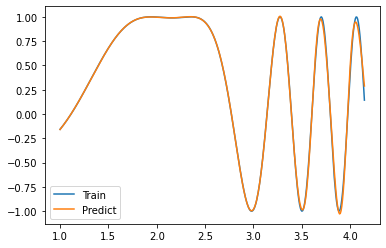

In [34]:
plt.plot(xTrain, yTrain, label='Train')
plt.plot(xTrain, xPredicted, label='Predict')
plt.legend()

Предсказание по тестовой выборке

In [35]:
xPredicted = traincgp.predict(scaledTestX)
xPredicted = scaler_y.inverse_transform(xPredicted)

Ошибка предсказания на тестовой выборке

In [36]:
mse = mean_squared_error(yTest, xPredicted.flatten())
print(f'MSE = {mse}')
print(f'RMSE = {np.sqrt(mse)}')

MSE = 2.954872256659715
RMSE = 1.7189741873162945


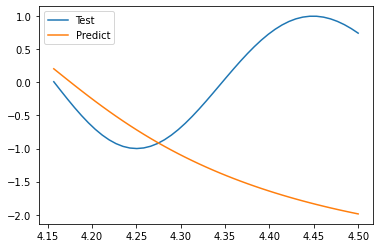

In [37]:
plt.plot(xTest, yTest, label='Test')
plt.plot(xTest, xPredicted, label='Predict')
plt.legend()
plt.show()

## Задание 3

#### Метод второго порядка:
### Квазиньютоновский метод, предложенный Бройденом, Флетчером, Гольдфарбом, Шанно.

In [38]:
trainbfg = algorithms.QuasiNewton(network=[Input(1),
                                           Tanh(128),
                                           Linear(1),],
                                  update_function='bfgs', verbose=True)


Main information

[ALGORITHM] QuasiNewton

[OPTION] epsilon = 1e-07
[OPTION] h0_scale = 1
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] target = Tensor("placeholder/target/linear-2:0", shape=(?, 1), dtype=float32)
[OPTION] update_function = bfgs
[OPTION] verbose = True
[OPTION] wolfe_c1 = 0.0001
[OPTION] wolfe_c2 = 0.9
[OPTION] wolfe_maxiter = 20

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 1.37 seconds


Обучаем нейросеть на 300 эпохах.

In [39]:
trainbfg.train(scaledTrainX, scaledTrainY, epochs=300)

#1 : [555 ms] train: 0.738127
#2 : [10 ms] train: 0.712137
#3 : [6 ms] train: 0.559515
#4 : [5 ms] train: 0.538579
#5 : [11 ms] train: 0.526555
#6 : [10 ms] train: 0.520941
#7 : [11 ms] train: 0.516951
#8 : [11 ms] train: 0.514556
#9 : [10 ms] train: 0.514116
#10 : [10 ms] train: 0.512705
#11 : [11 ms] train: 0.510570
#12 : [10 ms] train: 0.506107
#13 : [11 ms] train: 0.501260
#14 : [7 ms] train: 0.498270
#15 : [11 ms] train: 0.497148
#16 : [11 ms] train: 0.494513
#17 : [10 ms] train: 0.486771
#18 : [11 ms] train: 0.478562
#19 : [6 ms] train: 0.466402
#20 : [6 ms] train: 0.462672
#21 : [10 ms] train: 0.458371
#22 : [6 ms] train: 0.455018


#23 : [14 ms] train: 0.451022
#24 : [13 ms] train: 0.443173
#25 : [7 ms] train: 0.435741
#26 : [6 ms] train: 0.432680
#27 : [6 ms] train: 0.432133
#28 : [10 ms] train: 0.431947
#29 : [10 ms] train: 0.431701
#30 : [10 ms] train: 0.429836
#31 : [6 ms] train: 0.426284
#32 : [10 ms] train: 0.423179
#33 : [6 ms] train: 0.419198
#34 : [6 ms] train: 0.418332
#35 : [11 ms] train: 0.417003
#36 : [5 ms] train: 0.415181
#37 : [6 ms] train: 0.412144
#38 : [6 ms] train: 0.407865
#39 : [5 ms] train: 0.402809
#40 : [7 ms] train: 0.400642
#41 : [5 ms] train: 0.398269
#42 : [10 ms] train: 0.397847
#43 : [7 ms] train: 0.396028
#44 : [13 ms] train: 0.390932
#45 : [10 ms] train: 0.385846
#46 : [10 ms] train: 0.373496


#47 : [11 ms] train: 0.358057
#48 : [10 ms] train: 0.353914
#49 : [8 ms] train: 0.342686
#50 : [5 ms] train: 0.336994
#51 : [11 ms] train: 0.325771
#52 : [7 ms] train: 0.323472
#53 : [11 ms] train: 0.316693
#54 : [6 ms] train: 0.315013
#55 : [11 ms] train: 0.314341
#56 : [6 ms] train: 0.312971
#57 : [11 ms] train: 0.310003
#58 : [6 ms] train: 0.306330
#59 : [6 ms] train: 0.302150
#60 : [5 ms] train: 0.299753
#61 : [5 ms] train: 0.297866
#62 : [5 ms] train: 0.296988
#63 : [10 ms] train: 0.296270
#64 : [10 ms] train: 0.295306
#65 : [6 ms] train: 0.291488
#66 : [6 ms] train: 0.288711
#67 : [7 ms] train: 0.284023
#68 : [5 ms] train: 0.275879
#69 : [6 ms] train: 0.269449
#70 : [11 ms] train: 0.261983
#71 : [11 ms] train: 0.255853
#72 : [6 ms] train: 0.246211
#73 : [6 ms] train: 0.239171


#74 : [11 ms] train: 0.233269
#75 : [11 ms] train: 0.230294
#76 : [7 ms] train: 0.227564
#77 : [11 ms] train: 0.223881
#78 : [6 ms] train: 0.213591
#79 : [6 ms] train: 0.205193
#80 : [5 ms] train: 0.199578
#81 : [11 ms] train: 0.186817
#82 : [6 ms] train: 0.178115
#83 : [10 ms] train: 0.166898
#84 : [5 ms] train: 0.151605
#85 : [5 ms] train: 0.141810
#86 : [7 ms] train: 0.127271
#87 : [6 ms] train: 0.109219
#88 : [6 ms] train: 0.093320
#89 : [6 ms] train: 0.083763
#90 : [9 ms] train: 0.072615
#91 : [6 ms] train: 0.064306
#92 : [9 ms] train: 0.060338
#93 : [11 ms] train: 0.056764
#94 : [5 ms] train: 0.053861
#95 : [7 ms] train: 0.050704
#96 : [5 ms] train: 0.046992
#97 : [5 ms] train: 0.040673
#98 : [7 ms] train: 0.037162
#99 : [7 ms] train: 0.033774
#100 : [11 ms] train: 0.032738


#101 : [12 ms] train: 0.030925
#102 : [9 ms] train: 0.027393
#103 : [8 ms] train: 0.024983
#104 : [10 ms] train: 0.023909
#105 : [7 ms] train: 0.021351
#106 : [5 ms] train: 0.020937
#107 : [6 ms] train: 0.020317
#108 : [11 ms] train: 0.018975
#109 : [10 ms] train: 0.018129
#110 : [5 ms] train: 0.016581
#111 : [5 ms] train: 0.015895
#112 : [12 ms] train: 0.014868
#113 : [10 ms] train: 0.013897
#114 : [10 ms] train: 0.012819
#115 : [11 ms] train: 0.011722
#116 : [10 ms] train: 0.010986
#117 : [9 ms] train: 0.010485
#118 : [7 ms] train: 0.009946
#119 : [6 ms] train: 0.009479
#120 : [10 ms] train: 0.009017
#121 : [10 ms] train: 0.008597
#122 : [11 ms] train: 0.008008
#123 : [10 ms] train: 0.007250


#124 : [9 ms] train: 0.006588
#125 : [8 ms] train: 0.006173
#126 : [10 ms] train: 0.005896
#127 : [9 ms] train: 0.005606
#128 : [6 ms] train: 0.005501
#129 : [11 ms] train: 0.005378
#130 : [5 ms] train: 0.005143
#131 : [11 ms] train: 0.004894
#132 : [7 ms] train: 0.004495
#133 : [7 ms] train: 0.003994
#134 : [5 ms] train: 0.003671
#135 : [5 ms] train: 0.003461
#136 : [7 ms] train: 0.003252
#137 : [8 ms] train: 0.003203
#138 : [6 ms] train: 0.003140
#139 : [10 ms] train: 0.003106
#140 : [8 ms] train: 0.003043
#141 : [9 ms] train: 0.002948
#142 : [12 ms] train: 0.002864
#143 : [5 ms] train: 0.002776
#144 : [12 ms] train: 0.002715
#145 : [11 ms] train: 0.002663
#146 : [10 ms] train: 0.002615
#147 : [12 ms] train: 0.002548


#148 : [15 ms] train: 0.002491
#149 : [6 ms] train: 0.002348
#150 : [7 ms] train: 0.002185
#151 : [10 ms] train: 0.001965
#152 : [9 ms] train: 0.001805
#153 : [5 ms] train: 0.001701
#154 : [12 ms] train: 0.001662
#155 : [6 ms] train: 0.001578
#156 : [12 ms] train: 0.001502
#157 : [5 ms] train: 0.001387
#158 : [12 ms] train: 0.001257
#159 : [11 ms] train: 0.001121
#160 : [6 ms] train: 0.000982
#161 : [5 ms] train: 0.000935
#162 : [7 ms] train: 0.000899
#163 : [5 ms] train: 0.000826
#164 : [10 ms] train: 0.000811
#165 : [5 ms] train: 0.000755
#166 : [5 ms] train: 0.000728
#167 : [7 ms] train: 0.000702
#168 : [9 ms] train: 0.000655
#169 : [8 ms] train: 0.000619
#170 : [6 ms] train: 0.000581
#171 : [7 ms] train: 0.000551
#172 : [6 ms] train: 0.000511
#173 : [10 ms] train: 0.000491


#174 : [11 ms] train: 0.000476
#175 : [14 ms] train: 0.000464
#176 : [10 ms] train: 0.000457
#177 : [10 ms] train: 0.000448
#178 : [10 ms] train: 0.000434
#179 : [9 ms] train: 0.000419
#180 : [10 ms] train: 0.000395
#181 : [10 ms] train: 0.000373
#182 : [9 ms] train: 0.000358
#183 : [13 ms] train: 0.000347
#184 : [11 ms] train: 0.000338
#185 : [11 ms] train: 0.000328
#186 : [11 ms] train: 0.000320
#187 : [10 ms] train: 0.000316
#188 : [7 ms] train: 0.000314
#189 : [9 ms] train: 0.000312
#190 : [10 ms] train: 0.000310
#191 : [10 ms] train: 0.000307
#192 : [10 ms] train: 0.000299
#193 : [9 ms] train: 0.000291


#194 : [13 ms] train: 0.000277
#195 : [12 ms] train: 0.000262
#196 : [9 ms] train: 0.000251
#197 : [11 ms] train: 0.000244
#198 : [9 ms] train: 0.000240
#199 : [10 ms] train: 0.000234
#200 : [10 ms] train: 0.000227
#201 : [10 ms] train: 0.000223
#202 : [11 ms] train: 0.000219
#203 : [10 ms] train: 0.000214
#204 : [8 ms] train: 0.000208
#205 : [6 ms] train: 0.000202
#206 : [10 ms] train: 0.000200
#207 : [10 ms] train: 0.000197
#208 : [9 ms] train: 0.000197
#209 : [11 ms] train: 0.000195
#210 : [9 ms] train: 0.000191
#211 : [6 ms] train: 0.000185
#212 : [9 ms] train: 0.000179
#213 : [10 ms] train: 0.000166
#214 : [10 ms] train: 0.000151
#215 : [5 ms] train: 0.000136


#216 : [9 ms] train: 0.000135
#217 : [9 ms] train: 0.000132
#218 : [11 ms] train: 0.000131
#219 : [9 ms] train: 0.000130
#220 : [11 ms] train: 0.000129
#221 : [10 ms] train: 0.000127
#222 : [10 ms] train: 0.000125
#223 : [10 ms] train: 0.000123
#224 : [9 ms] train: 0.000119
#225 : [9 ms] train: 0.000115
#226 : [8 ms] train: 0.000110
#227 : [9 ms] train: 0.000104
#228 : [6 ms] train: 0.000098
#229 : [6 ms] train: 0.000094
#230 : [8 ms] train: 0.000091
#231 : [10 ms] train: 0.000089
#232 : [9 ms] train: 0.000086
#233 : [8 ms] train: 0.000081
#234 : [8 ms] train: 0.000078
#235 : [5 ms] train: 0.000075
#236 : [6 ms] train: 0.000073
#237 : [6 ms] train: 0.000069
#238 : [7 ms] train: 0.000068
#239 : [9 ms] train: 0.000066


#240 : [11 ms] train: 0.000065
#241 : [8 ms] train: 0.000064
#242 : [9 ms] train: 0.000063
#243 : [6 ms] train: 0.000063
#244 : [10 ms] train: 0.000062
#245 : [10 ms] train: 0.000061
#246 : [7 ms] train: 0.000061
#247 : [8 ms] train: 0.000061
#248 : [8 ms] train: 0.000060
#249 : [10 ms] train: 0.000060
#250 : [9 ms] train: 0.000060
#251 : [9 ms] train: 0.000059
#252 : [8 ms] train: 0.000058
#253 : [10 ms] train: 0.000057
#254 : [10 ms] train: 0.000056
#255 : [10 ms] train: 0.000056
#256 : [10 ms] train: 0.000055
#257 : [8 ms] train: 0.000055
#258 : [11 ms] train: 0.000054
#259 : [5 ms] train: 0.000053
#260 : [7 ms] train: 0.000052
#261 : [9 ms] train: 0.000049
#262 : [5 ms] train: 0.000046
#263 : [6 ms] train: 0.000044


#264 : [12 ms] train: 0.000041
#265 : [9 ms] train: 0.000039
#266 : [6 ms] train: 0.000037
#267 : [9 ms] train: 0.000036
#268 : [9 ms] train: 0.000035
#269 : [6 ms] train: 0.000035
#270 : [8 ms] train: 0.000035
#271 : [9 ms] train: 0.000035
#272 : [7 ms] train: 0.000034
#273 : [9 ms] train: 0.000034
#274 : [8 ms] train: 0.000034
#275 : [10 ms] train: 0.000034
#276 : [11 ms] train: 0.000032
#277 : [11 ms] train: 0.000031
#278 : [7 ms] train: 0.000029
#279 : [7 ms] train: 0.000028
#280 : [13 ms] train: 0.000027
#281 : [7 ms] train: 0.000026
#282 : [6 ms] train: 0.000025
#283 : [5 ms] train: 0.000025
#284 : [6 ms] train: 0.000024
#285 : [8 ms] train: 0.000024
#286 : [7 ms] train: 0.000023
#287 : [11 ms] train: 0.000023
#288 : [5 ms] train: 0.000022
#289 : [8 ms] train: 0.000022
#290 : [13 ms] train: 0.000022
#291 : [7 ms] train: 0.000021
#292 : [11 ms] train: 0.000021
#293 : [10 ms] train: 0.000021
#294 : [16 ms] train: 0.000021
#295 : [9 ms] train: 0.000021
#296 : [7 ms] train: 0.000020


Предсказание по тренировочной выборке

In [40]:
xPredicted = trainbfg.predict(scaledTrainX)
xPredicted = scaler_y.inverse_transform(xPredicted)

Ошибка предсказания на тренировочной выборке

In [41]:
mse = mean_squared_error(yTrain, xPredicted.flatten())
print(f'MSE = {mse}')
print(f'RMSE = {np.sqrt(mse)}')

MSE = 8.665136320779325e-06
RMSE = 0.0029436603609756555


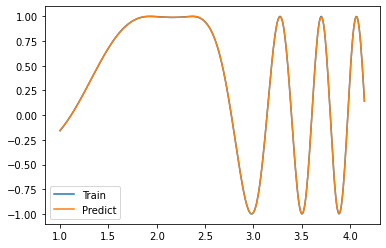

In [42]:
plt.plot(xTrain, yTrain, label='Train')
plt.plot(xTrain, xPredicted, label='Predict')
plt.legend()

Предсказание по тестовой выборке

In [43]:
xPredicted = trainbfg.predict(scaledTestX)
xPredicted = scaler_y.inverse_transform(xPredicted)

Ошибка предсказания на тестовой выборке

In [44]:
mse = mean_squared_error(yTest, xPredicted.flatten())
print(f'MSE = {mse}')
print(f'RMSE = {np.sqrt(mse)}')

MSE = 13.175384495324069
RMSE = 3.629791246796993


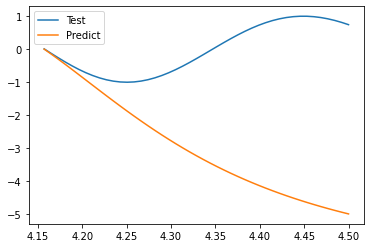

In [45]:
plt.plot(xTest, yTest, label='Test')
plt.plot(xTest, xPredicted, label='Predict')
plt.legend()
plt.show()